# Project 2: Part 1


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
import nltk
# We need to download the following to avoid errors.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import string
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from collections import defaultdict
import umap.umap_ as umap
from sklearn.cluster import AgglomerativeClustering
!pip install hdbscan
import hdbscan
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

#np.random.seed(42)
#random.seed(42)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/golaraahmadiazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/golaraahmadiazar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/golaraahmadiazar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/golaraahmadiazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Clustering with Sparse Text Representations

## Generate sparse TF-IDF representations

In [ ]:
cats = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'
       ]
newsgroups = fetch_20newsgroups(remove=("headers", "footers"), 
                                subset='all', categories=cats, shuffle=True,random_state=42,)

pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                        ('tfid', TfidfTransformer())]) 

vectors = pipe.fit_transform(newsgroups.data)
print('TF-IDF matrix shape: ',vectors.shape)

TF-IDF matrix shape:  (7882, 23822)


QUESTION 1: Report the dimensions of the TF-IDF matrix you obtain.<br>
*TF-IDF matrix shape:  (7882, 23822)*

In [ ]:
labels = newsgroups.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
print('unique labels are: ',unique_labels)
print('respective number of samples: ',category_sizes)

unique labels are:  [0 1 2 3 4 5 6 7]
respective number of samples:  [973 985 982 963 990 996 994 999]


## Clustering

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(
        n_clusters=2,
        max_iter=5000,
        n_init=50,
        random_state=0,
    )
X = model.fit_transform(vectors)
y = newsgroups.target

In [ ]:
print(X.shape)

(7882, 2)


QUESTION 2: Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped? <br>
*Please see below for the contingency matrix. The matrix does not need to be square shaped because in this example we have 8 classes (8 rows) and 2 clusters (2 columns).*

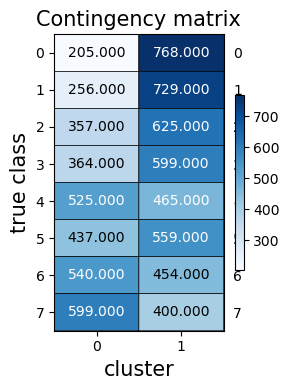

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

labels_pred = model.labels_
A = contingency_matrix(y, labels_pred)
import plotmat
plotmat.plot_mat(A,size=(3,4), xlabel = 'cluster', ylabel = 'true class', title = 'Contingency matrix')


QUESTION 3: Report the 5 clustering measures explained in the introduction for K- means clustering.

In [ ]:
scores = {}
scores["Homogeneity"]=metrics.homogeneity_score(y, labels_pred)
scores["Completeness"]=metrics.completeness_score(y, labels_pred)
scores["V-measure"]=metrics.v_measure_score(y, labels_pred)
scores["Adjusted Rand-Index"]=metrics.adjusted_rand_score(y, labels_pred)
scores["Adjusted mutual information score"]=metrics.adjusted_mutual_info_score(y, labels_pred)

for item in scores.keys():
    print(f'{item} = {scores[item]}')

Homogeneity = 0.017112889337986874
Completeness = 0.05239553465633152
V-measure = 0.025799433647114442
Adjusted Rand-Index = 0.016085804211321986
Adjusted mutual information score = 0.02548550420489448


# Clustering with Dense Text Representations
## Generate dense representations for better K-Means Clustering

QUESTION 4: Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

Text(0.5, 1.0, 'Plot for Question 4')

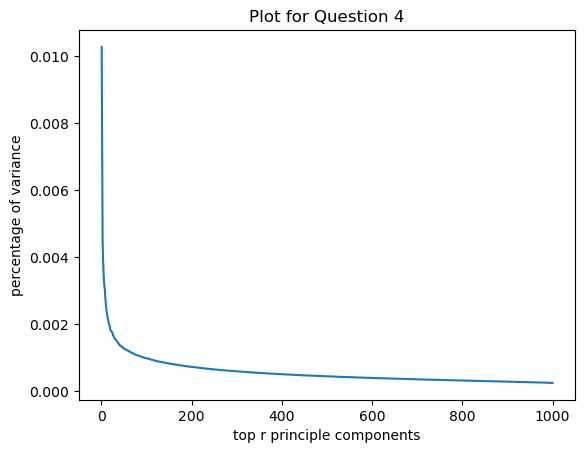

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000).fit(vectors)

plt.figure()
plt.plot(range(1,1001),svd.explained_variance_ratio_)
plt.xlabel('top r principle components')
plt.ylabel('percentage of variance')
plt.title('Plot for Question 4')
    


QUESTION 5:
Let r be the dimension that we want to reduce the data to (i.e. n components).
Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD
and NMF. Report a good choice of r for SVD and NMF respectively.<br>
*Please see the results below:*

Working on SVD for r=1...
Working on NMF for r=1...
Working on SVD for r=2...
Working on NMF for r=2...
Working on SVD for r=3...
Working on NMF for r=3...
Working on SVD for r=4...
Working on NMF for r=4...
Working on SVD for r=5...
Working on NMF for r=5...
Working on SVD for r=6...
Working on NMF for r=6...
Working on SVD for r=7...
Working on NMF for r=7...
Working on SVD for r=8...
Working on NMF for r=8...
Working on SVD for r=9...
Working on NMF for r=9...
Working on SVD for r=10...
Working on NMF for r=10...
Working on SVD for r=20...
Working on NMF for r=20...
Working on SVD for r=50...
Working on NMF for r=50...
Working on SVD for r=100...
Working on NMF for r=100...
Working on SVD for r=300...
Working on NMF for r=300...


Text(0.5, 1.0, 'NMF')

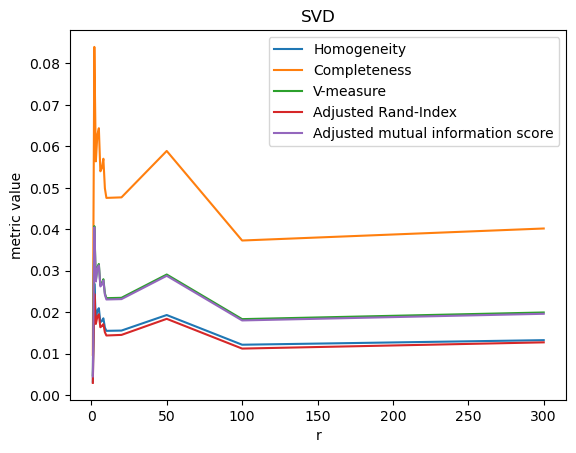

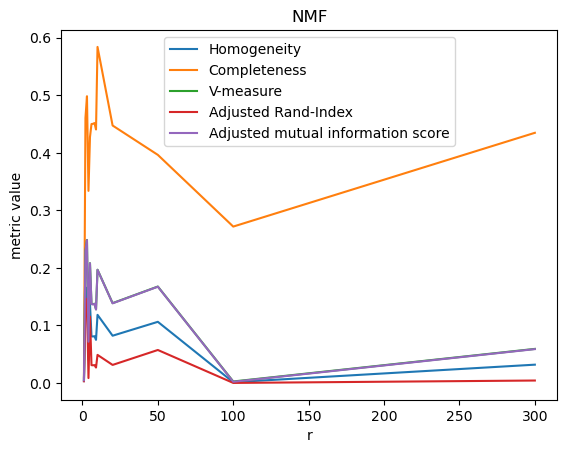

In [ ]:
from sklearn.decomposition import NMF
from collections import defaultdict

X_svd = svd.transform(vectors)
scores_svd = defaultdict(list)
scores_nmf = defaultdict(list)
K = list(range(1,11)) + [20, 50, 100, 300]
t = 1e-3
for k in K:
    
    #run-time considerations
    if k>10:
        t = 1e-2
    if k>40:
        t = 1e-1
    
    print(f'Working on SVD for r={k}...')
    #truncated SVD
    X_svd_k = X_svd[:,:k]
    
    model = KMeans(n_clusters=2,max_iter=1000,n_init=30,random_state=0, tol=t)
    model.fit(X_svd_k)
    
    scores_svd["Homogeneity"].append(metrics.homogeneity_score(y, model.labels_))
    scores_svd["Completeness"].append(metrics.completeness_score(y, model.labels_))
    scores_svd["V-measure"].append(metrics.v_measure_score(y, model.labels_))
    scores_svd["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(y, model.labels_))
    scores_svd["Adjusted mutual information score"].append(metrics.adjusted_mutual_info_score(y, model.labels_))
    
    print(f'Working on NMF for r={k}...')
    #NMF
    nmf = NMF(n_components=k, init='nndsvd',tol=0.01, max_iter=100) #
    X_nmf = nmf.fit_transform(vectors)
    
    model = KMeans(n_clusters=2,max_iter=1000,n_init=30,random_state=0, tol=t, algorithm = 'elkan')
    model.fit(X_nmf)

    scores_nmf["Homogeneity"].append(metrics.homogeneity_score(y, model.labels_))
    scores_nmf["Completeness"].append(metrics.completeness_score(y, model.labels_))
    scores_nmf["V-measure"].append(metrics.v_measure_score(y, model.labels_))
    scores_nmf["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(y, model.labels_))
    scores_nmf["Adjusted mutual information score"].append(metrics.adjusted_mutual_info_score(y, model.labels_))
    
plt.figure()
legends = []
for item in scores_svd.keys():
    plt.plot(K,scores_svd[item])
    legends.append(item)
plt.xlabel('r')
plt.ylabel('metric value')
plt.legend(legends)
plt.title('SVD')
    

plt.figure()
legends = []
for item in scores_nmf.keys():
    plt.plot(K,scores_nmf[item])
    legends.append(item)
plt.xlabel('r')
plt.ylabel('metric value')
plt.legend(legends)
plt.title('NMF')
   

    
    
    

In [ ]:
best_idx = np.argmax(scores_svd["Homogeneity"])
best_svd = K[best_idx]
print('best k for SVD: ',best_svd)
best_idx = np.argmax(scores_nmf["Homogeneity"])
best_nmf = K[best_idx]
print('best k for NMF: ',best_nmf)

best k for SVD:  2
best k for NMF:  3


QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?<br>
*Based on the figures, it seems that adding more than 50 and less than 100 components makes the model be too sensitive to noise and misclassify. Too few principle components makes the model underfit and relatively high number of principle components makes it overfit. Although it seems that very high number of components helps, the model converges too slowly and the improvement is not significant enough to justify the high complexity.*

QUESTION 7: Are these measures on average better than those computed in Question 3?<br>
*In general these measures improve when we use dimensionality reduction algorithms. Especially this improvement is significant when using NMF.*

## Visualize the clusters

QUESTION 8: Visualize the clustering results for:<br>
- SVD with your optimal choice of r for K-Means clustering;


Text(0.5, 0.98, 'Visualizing the clusters for optimal SVD')

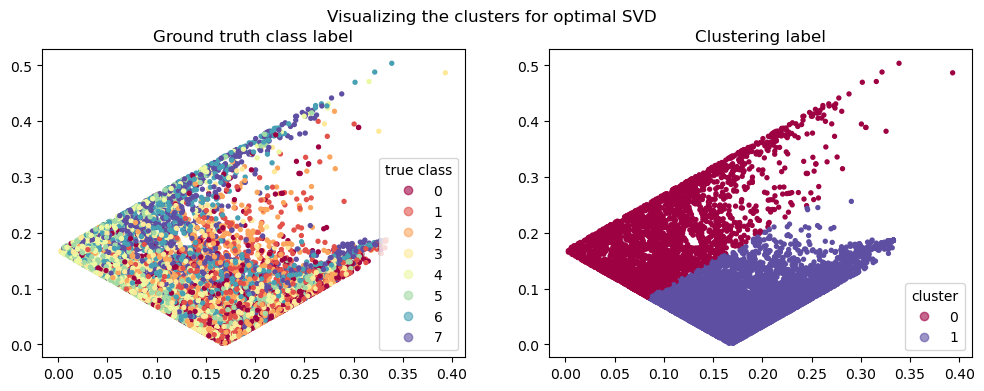

In [ ]:
k = best_svd
svd = TruncatedSVD(n_components=1000).fit(vectors)
X_svd = svd.transform(vectors)
X_svd_k = X_svd[:,:k]
model = KMeans(n_clusters=2,max_iter=1000,n_init=30,random_state=0)
X_km = model.fit_transform(X_svd_k)

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
sc1 = ax1.scatter(X_km[:,0], X_km[:, 1], c=y, cmap='Spectral', s=8)
sc2 = ax2.scatter(X_km[:,0], X_km[:, 1], c=model.labels_, cmap='Spectral', s=8)
ax1.set_title('Ground truth class label')
ax2.set_title('Clustering label')
handles, labels = sc1.legend_elements(prop="colors", alpha=0.6)
leg1 = ax1.legend(handles, labels, loc="lower right", title="true class")
handles, labels = sc2.legend_elements(prop="colors", alpha=0.6)
leg2 = ax2.legend(handles, labels, loc="lower right", title="cluster")
fig.suptitle('Visualizing the clusters for optimal SVD')

- NMF with your choice of r for K-Means clustering.

/Users/golaraahmadiazar/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0.5, 0.98, 'Visualizing the clusters for optimal NMF')

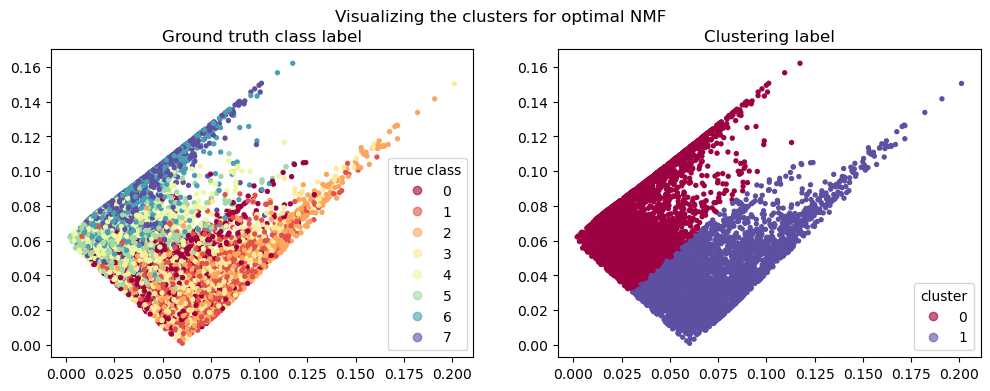

In [ ]:
k = best_nmf
nmf = NMF(n_components=k, init='nndsvd')
X_nmf = nmf.fit_transform(vectors)
model = KMeans(n_clusters=2,max_iter=1000,n_init=30,random_state=0)
X_km = model.fit_transform(X_nmf)

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
sc1 = ax1.scatter(X_km[:,0], X_km[:, 1], c=y, cmap='Spectral', s=8)
sc2 = ax2.scatter(X_km[:,0], X_km[:, 1], c=model.labels_, cmap='Spectral', s=8)
ax1.set_title('Ground truth class label')
ax2.set_title('Clustering label')
handles, labels = sc1.legend_elements(prop="colors", alpha=0.6)
leg1 = ax1.legend(handles, labels, loc="lower right", title="true class")
handles, labels = sc2.legend_elements(prop="colors", alpha=0.6)
leg2 = ax2.legend(handles, labels, loc="lower right", title="cluster")
fig.suptitle('Visualizing the clusters for optimal NMF')

QUESTION 9: What do you observe in the visualization? How are the data points of the two classes distributed? Is distribution of the data ideal for K-Means clustering? <br>
*My first observation is that NMF is a better dimensionality reduction algorithm for this dataset because the two true major classes are better separated. For SVD, the datapoints of two major classes are all mixed up and don't have distinguishable boundaries. Since K-means is more suitable for data that are clustered in round shapes, observing that the major classes in this dataset do not form round-shaped clusters, we can conclude that K-means clustering is not ideal.*

## Clustering of the Entire 20 Classes
QUESTION 10: Load documents with the same configuration as in Question 1, but for ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 . Visualize the contingency matrix and report the five clustering metrics (DO BOTH NMF AND SVD). <br>
*Here since we have more number of classes, I think the previous choices for number of components in dimensionality reduction is too low. So, with trial and error I realized that 50 components for SVD and 30 components for NMF give relatively better results.*


In [ ]:
newsgroups = fetch_20newsgroups(remove=("headers", "footers"), 
                                subset='all', shuffle=True,random_state=42,)

### SVD

number of components = 50
Homogeneity = 0.26555391159841873
Completeness = 0.28974248025852284
V-measure = 0.27712137199948034
Adjusted Rand-Index = 0.09534920733001052
Adjusted mutual information score = 0.27467724385189807


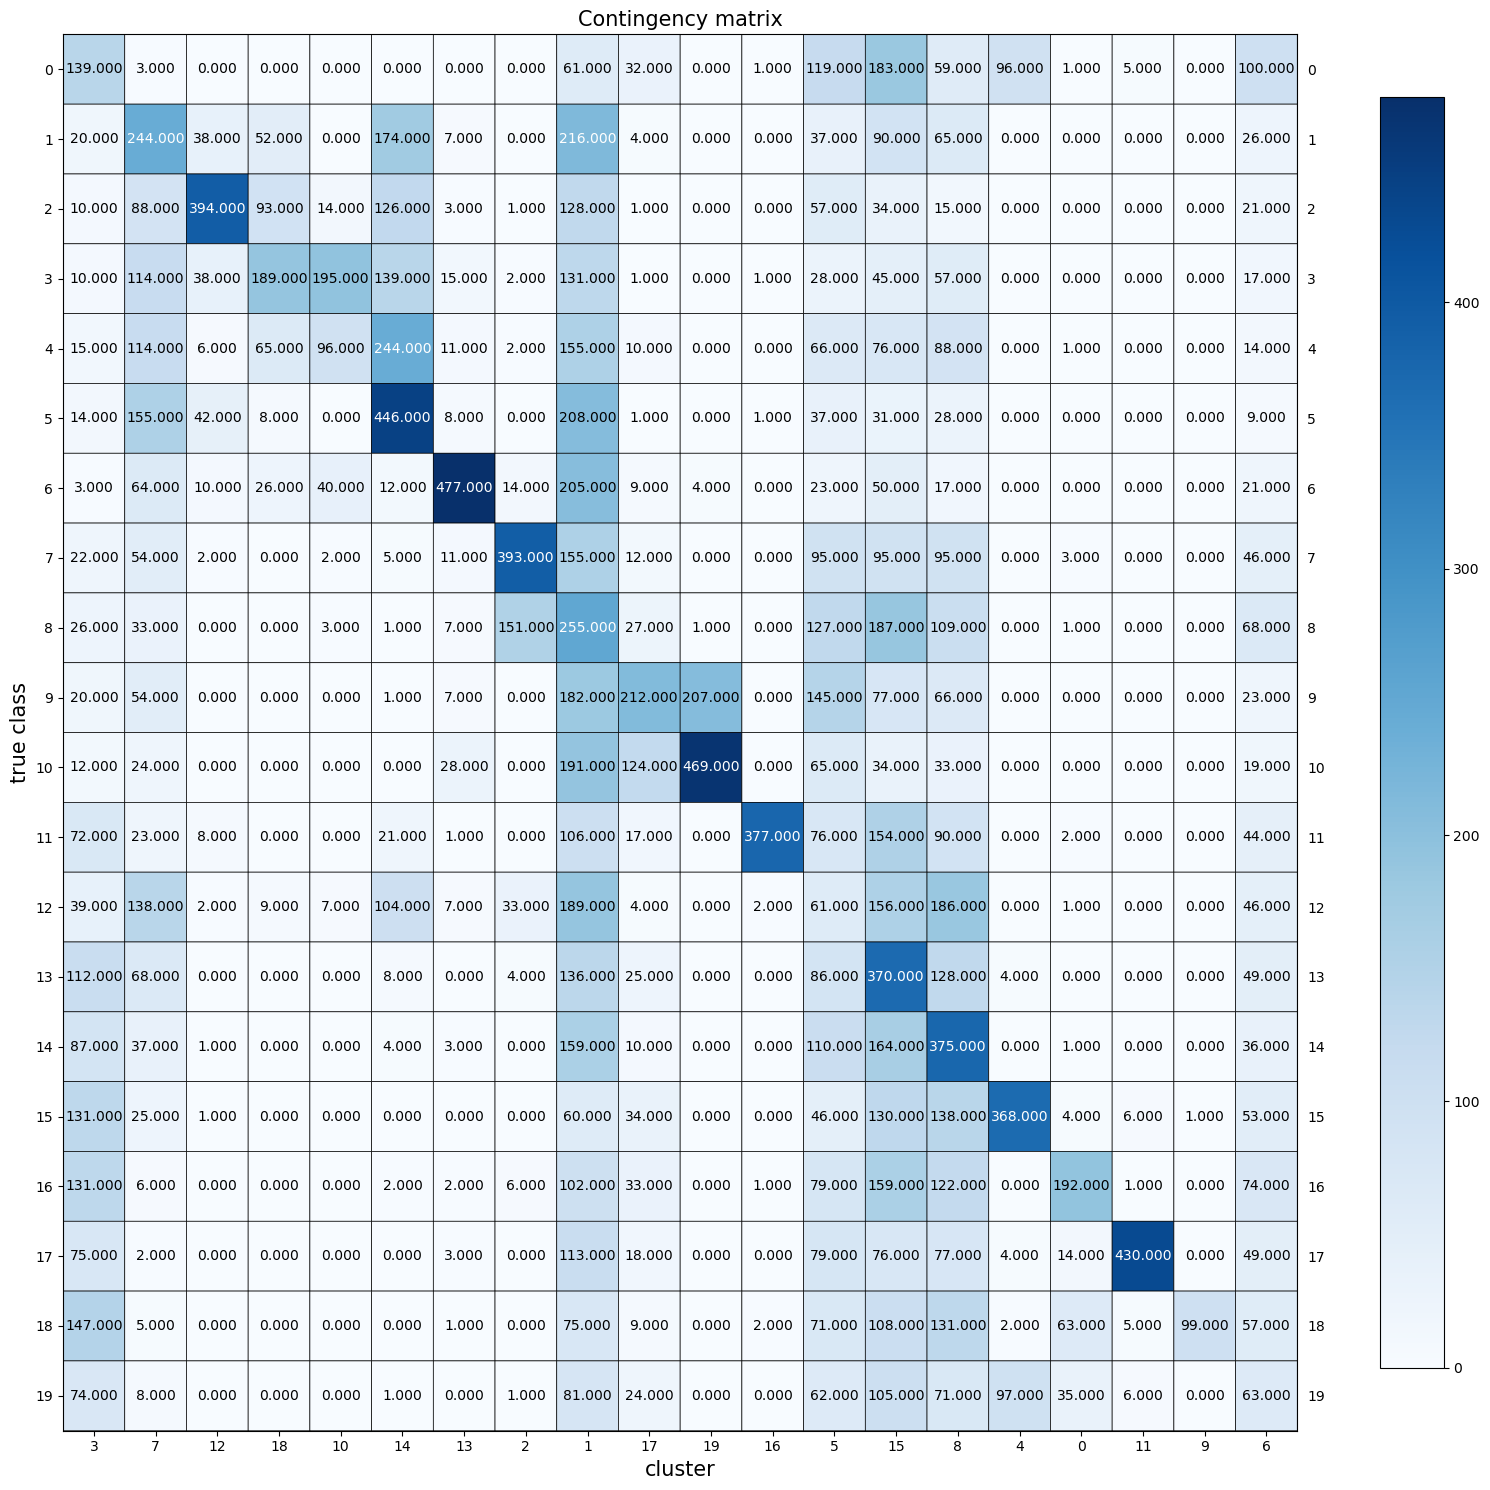

In [ ]:
k = 50
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                        ('tfid', TfidfTransformer()),
                 ('dimension reduction',TruncatedSVD(n_components=k)),
                 ('clustering',KMeans(n_clusters=20,max_iter=1000,n_init=30,random_state=0))
                ]) 

X = pipe.fit_transform(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
scores = {}
scores["Homogeneity"]=metrics.homogeneity_score(y, labels_pred)
scores["Completeness"]=metrics.completeness_score(y, labels_pred)
scores["V-measure"]=metrics.v_measure_score(y, labels_pred)
scores["Adjusted Rand-Index"]=metrics.adjusted_rand_score(y, labels_pred)
scores["Adjusted mutual information score"]=metrics.adjusted_mutual_info_score(y, labels_pred)

print(f'number of components = {k}')
for item in scores.keys():
    print(f'{item} = {scores[item]}')
    
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, labels_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plotmat.plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15), xlabel = 'cluster', ylabel = 'true class', title = 'Contingency matrix')

### NMF

/Users/golaraahmadiazar/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


number of components = 30
Homogeneity = 0.24560292982128634
Completeness = 0.2935786031686856
V-measure = 0.2674563599061951
Adjusted Rand-Index = 0.06862292639538714
Adjusted mutual information score = 0.264864617156294


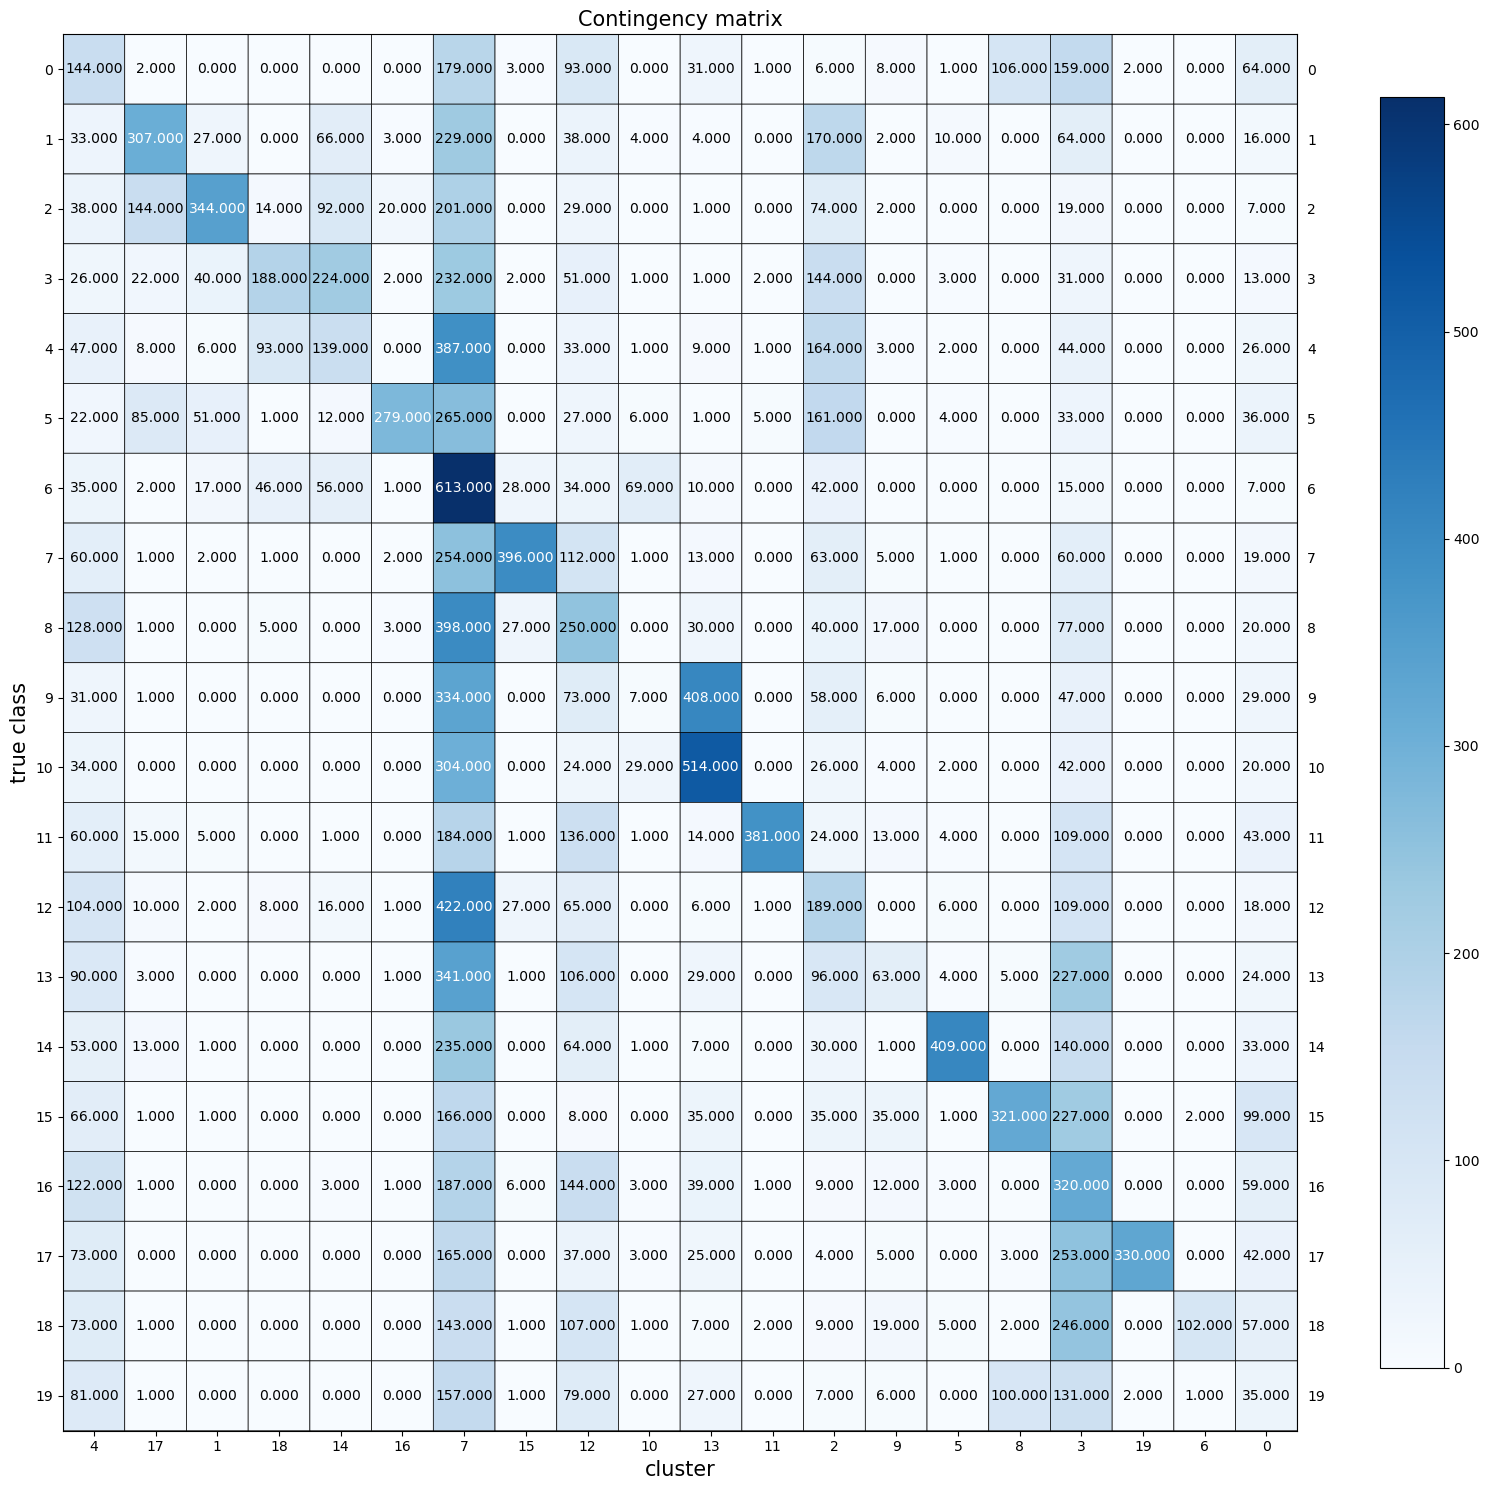

In [ ]:
k = 30
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                        ('tfid', TfidfTransformer()),
                 ('dimension reduction',NMF(n_components=k, init='nndsvd')),
                 ('clustering',KMeans(n_clusters=20,max_iter=5000,n_init=30,random_state=0))
                ]) 

X = pipe.fit_transform(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
scores = {}
scores["Homogeneity"]=metrics.homogeneity_score(y, labels_pred)
scores["Completeness"]=metrics.completeness_score(y, labels_pred)
scores["V-measure"]=metrics.v_measure_score(y, labels_pred)
scores["Adjusted Rand-Index"]=metrics.adjusted_rand_score(y, labels_pred)
scores["Adjusted mutual information score"]=metrics.adjusted_mutual_info_score(y, labels_pred)
print(f'number of components = {k}')
for item in scores.keys():
    print(f'{item} = {scores[item]}')
    
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, labels_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
plotmat.plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15), xlabel = 'cluster', ylabel = 'true class', title = 'Contingency matrix')

## UMAP
QUESTION 11: Reduce the dimension of your dataset with UMAP. Consider the following settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric fails, please look at the FAQ at the end of this spec.
Report the permuted contingency matrix and the five clustering evaluation metrics for the different combinations (6 combinations).

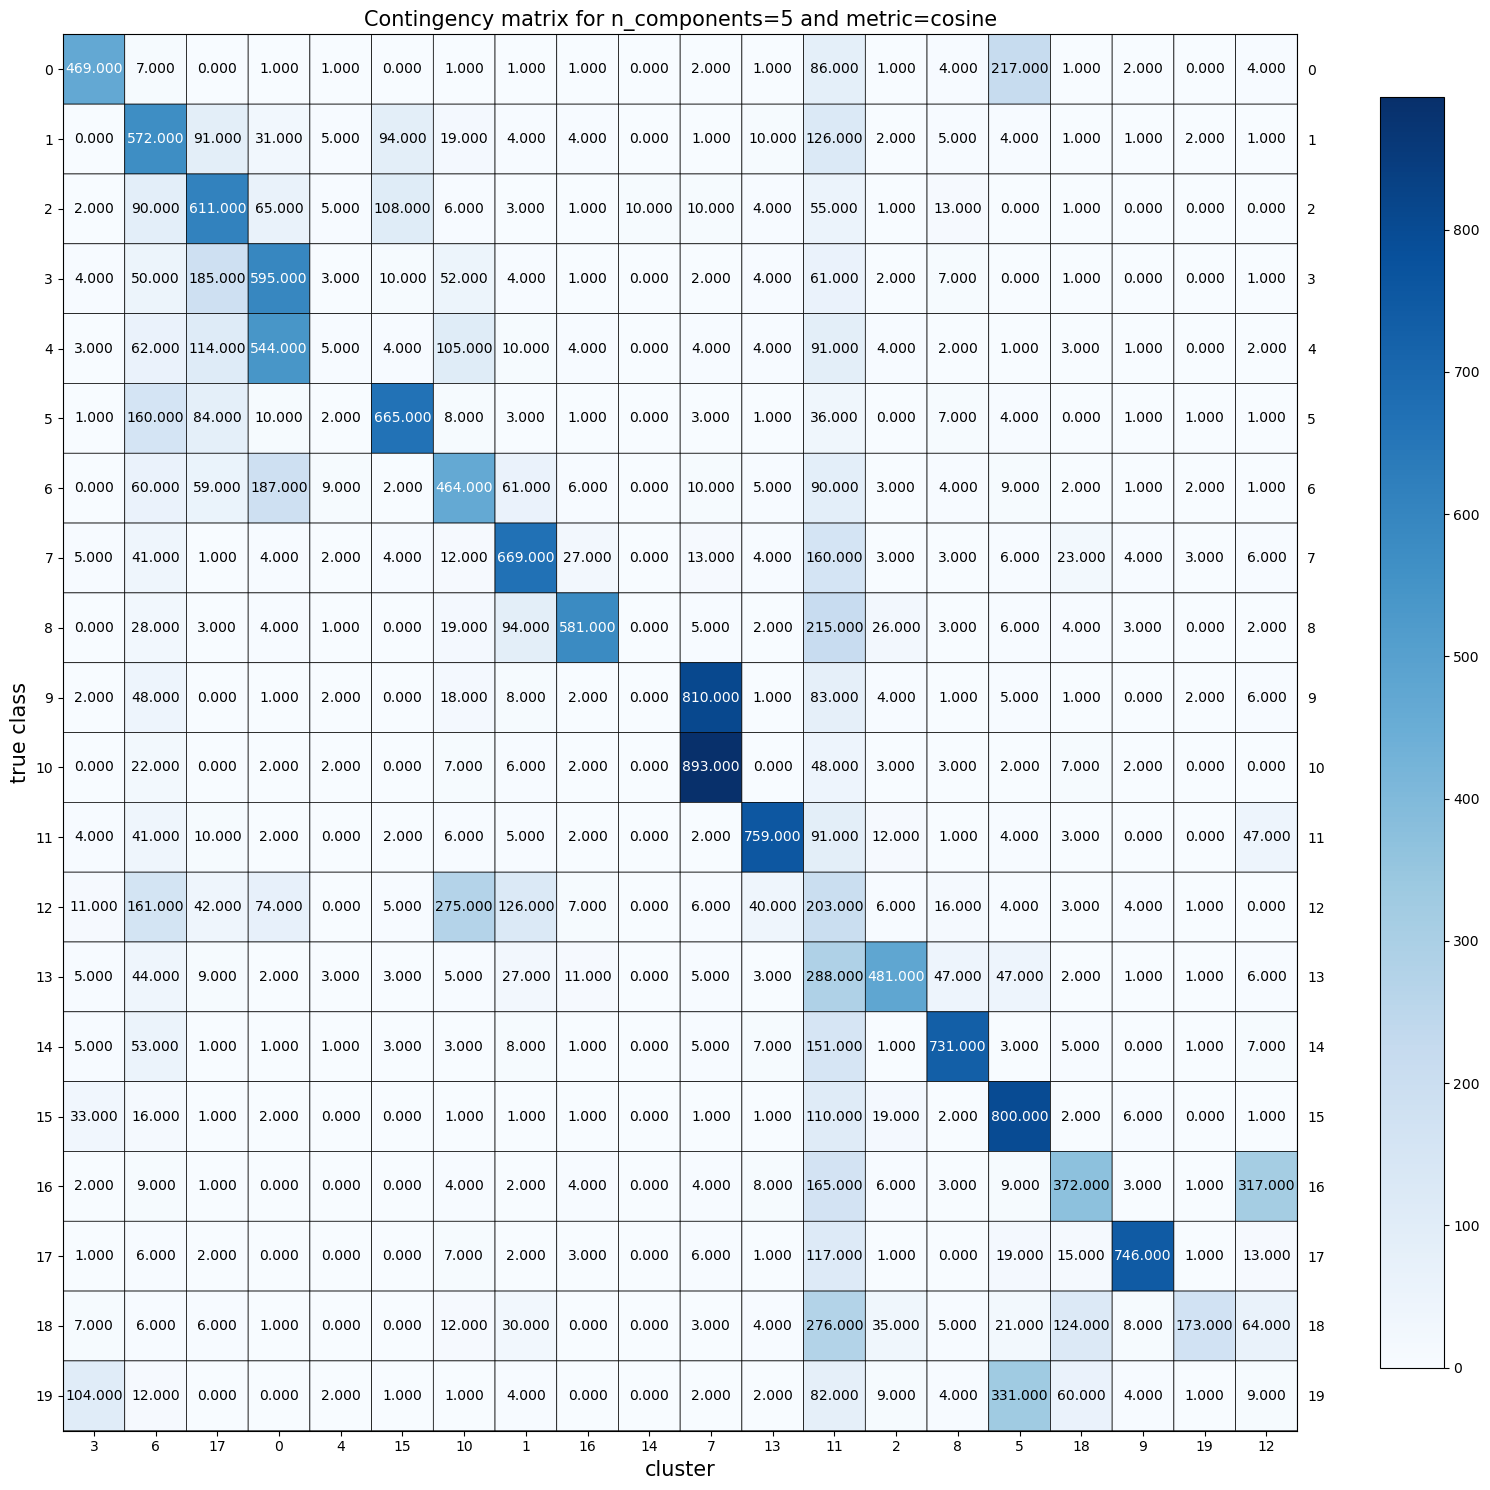

n_components = 5 , metric = cosine
Homogeneity = 0.5098613694009748
Completeness = 0.5494160109407761
V-measure = 0.5289001821575932
Adjusted Rand-Index = 0.345779070503809
Adjusted mutual information score = 0.5273083695640526


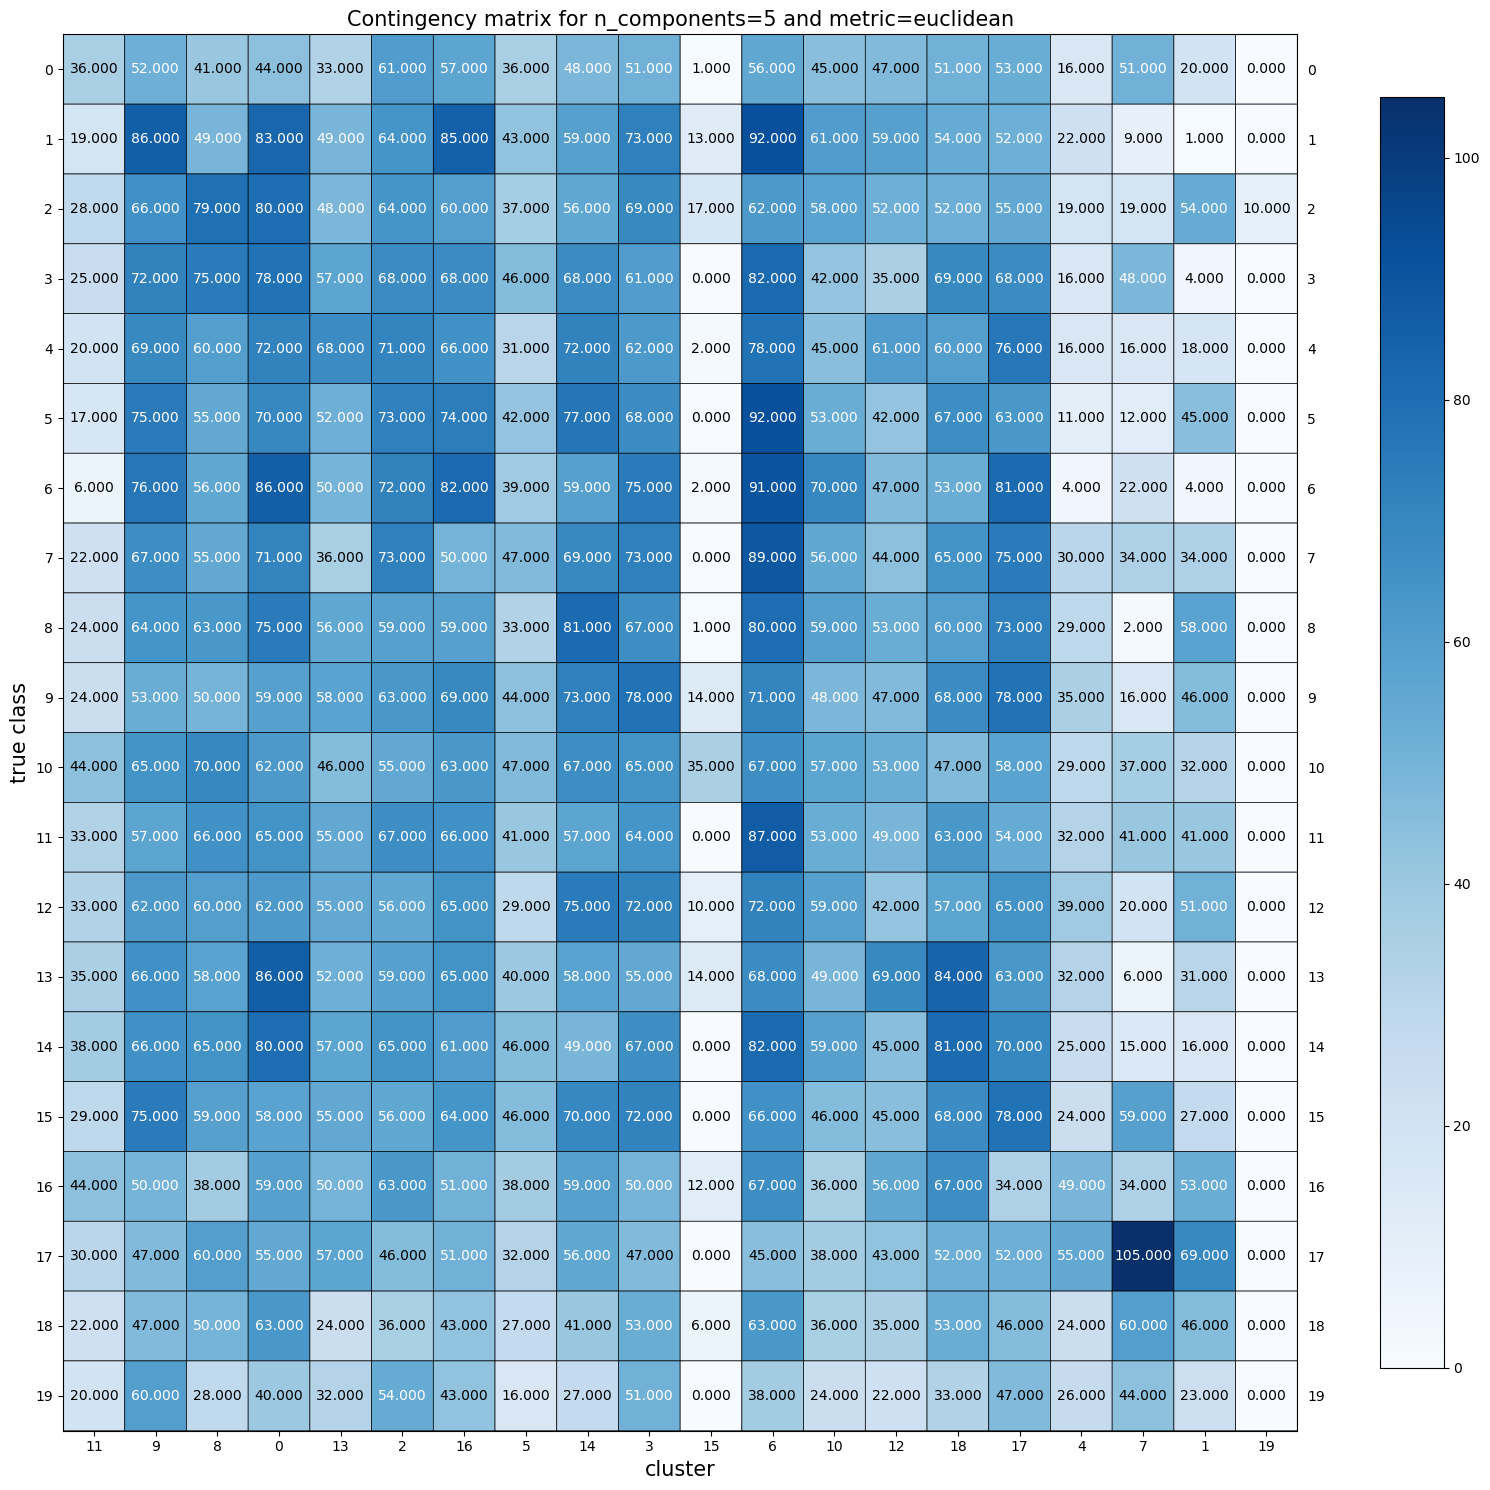

n_components = 5 , metric = euclidean
Homogeneity = 0.013034721191311055
Completeness = 0.013558049408726063
V-measure = 0.013291235922632089
Adjusted Rand-Index = 0.0017629765369576004
Adjusted mutual information score = 0.010035235818418088


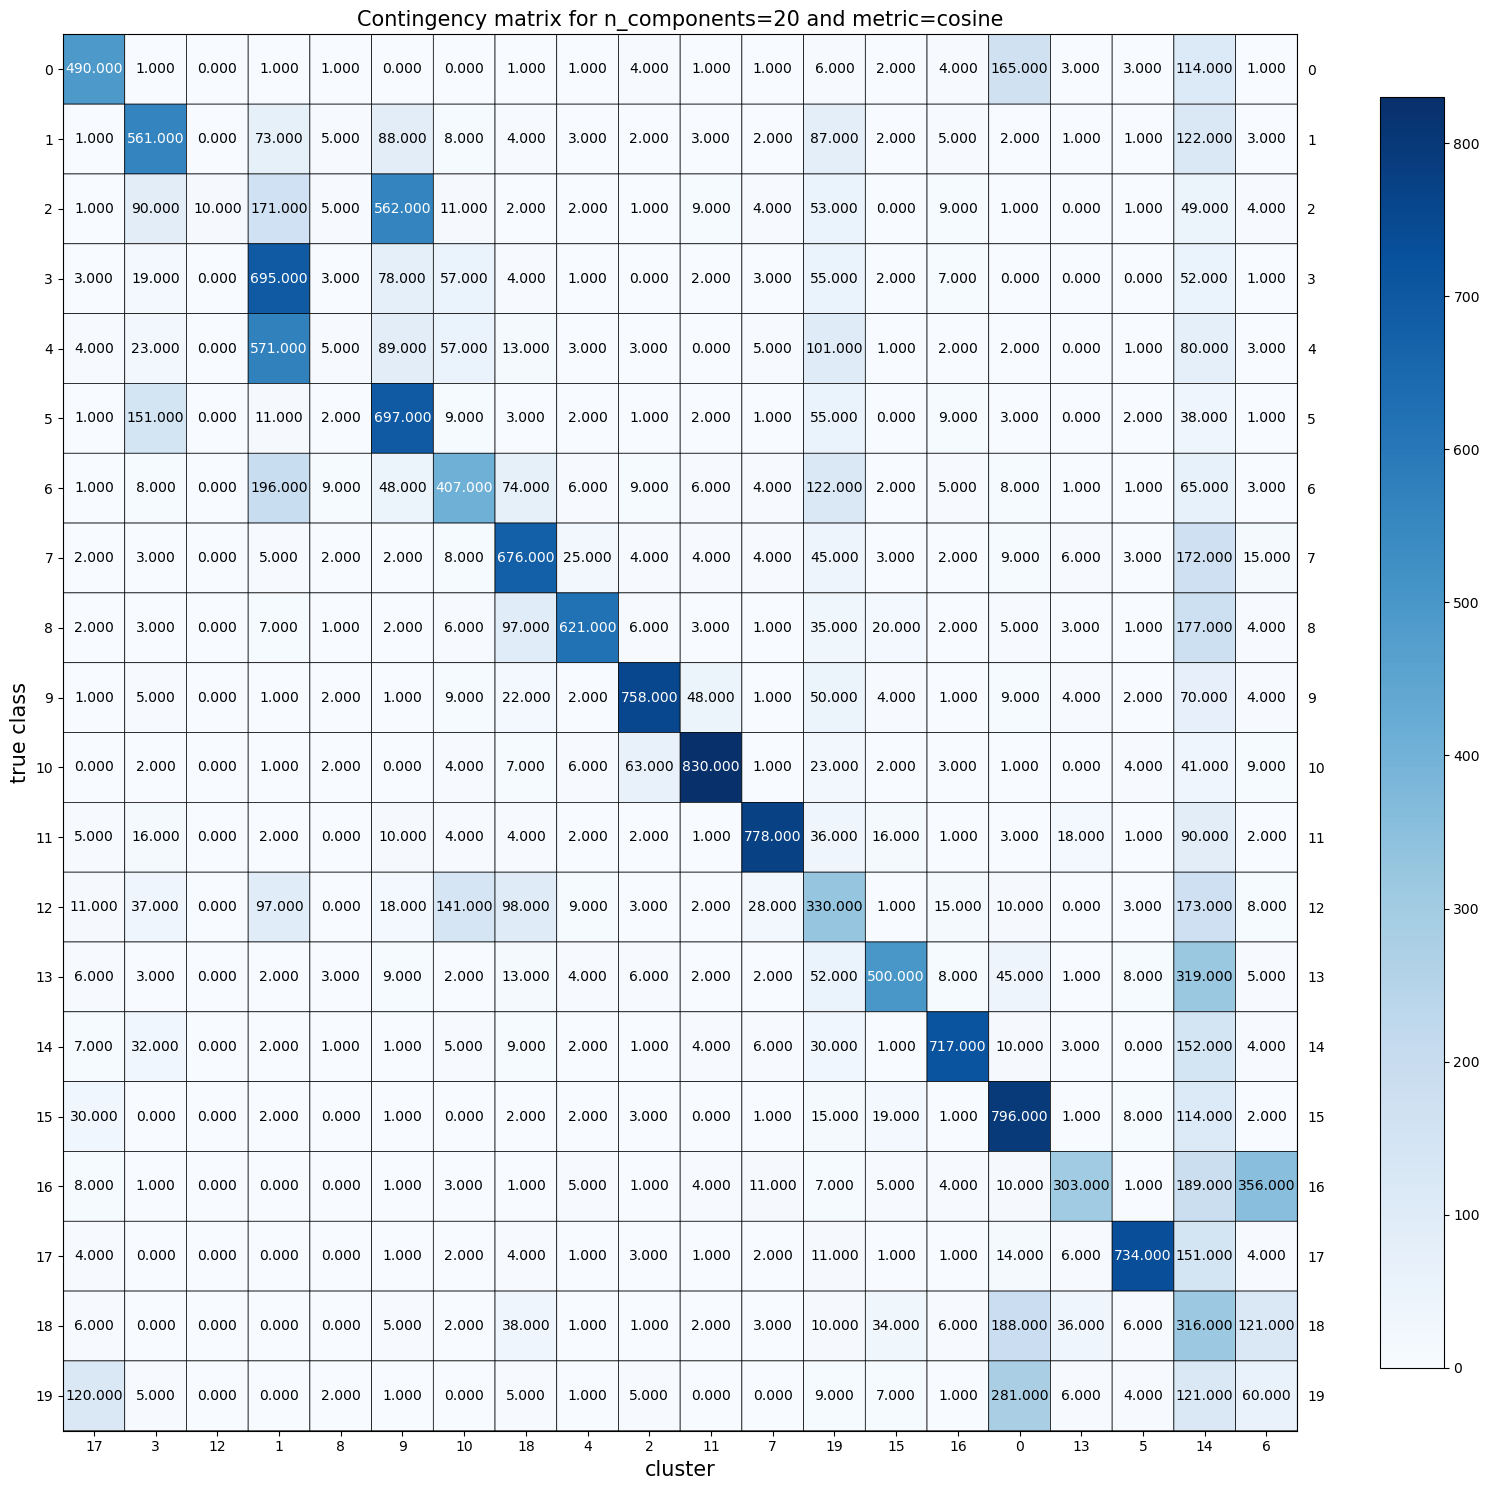

n_components = 20 , metric = cosine
Homogeneity = 0.5129124447223533
Completeness = 0.5491775923982593
V-measure = 0.5304258804034695
Adjusted Rand-Index = 0.347125260176462
Adjusted mutual information score = 0.5288451912841651


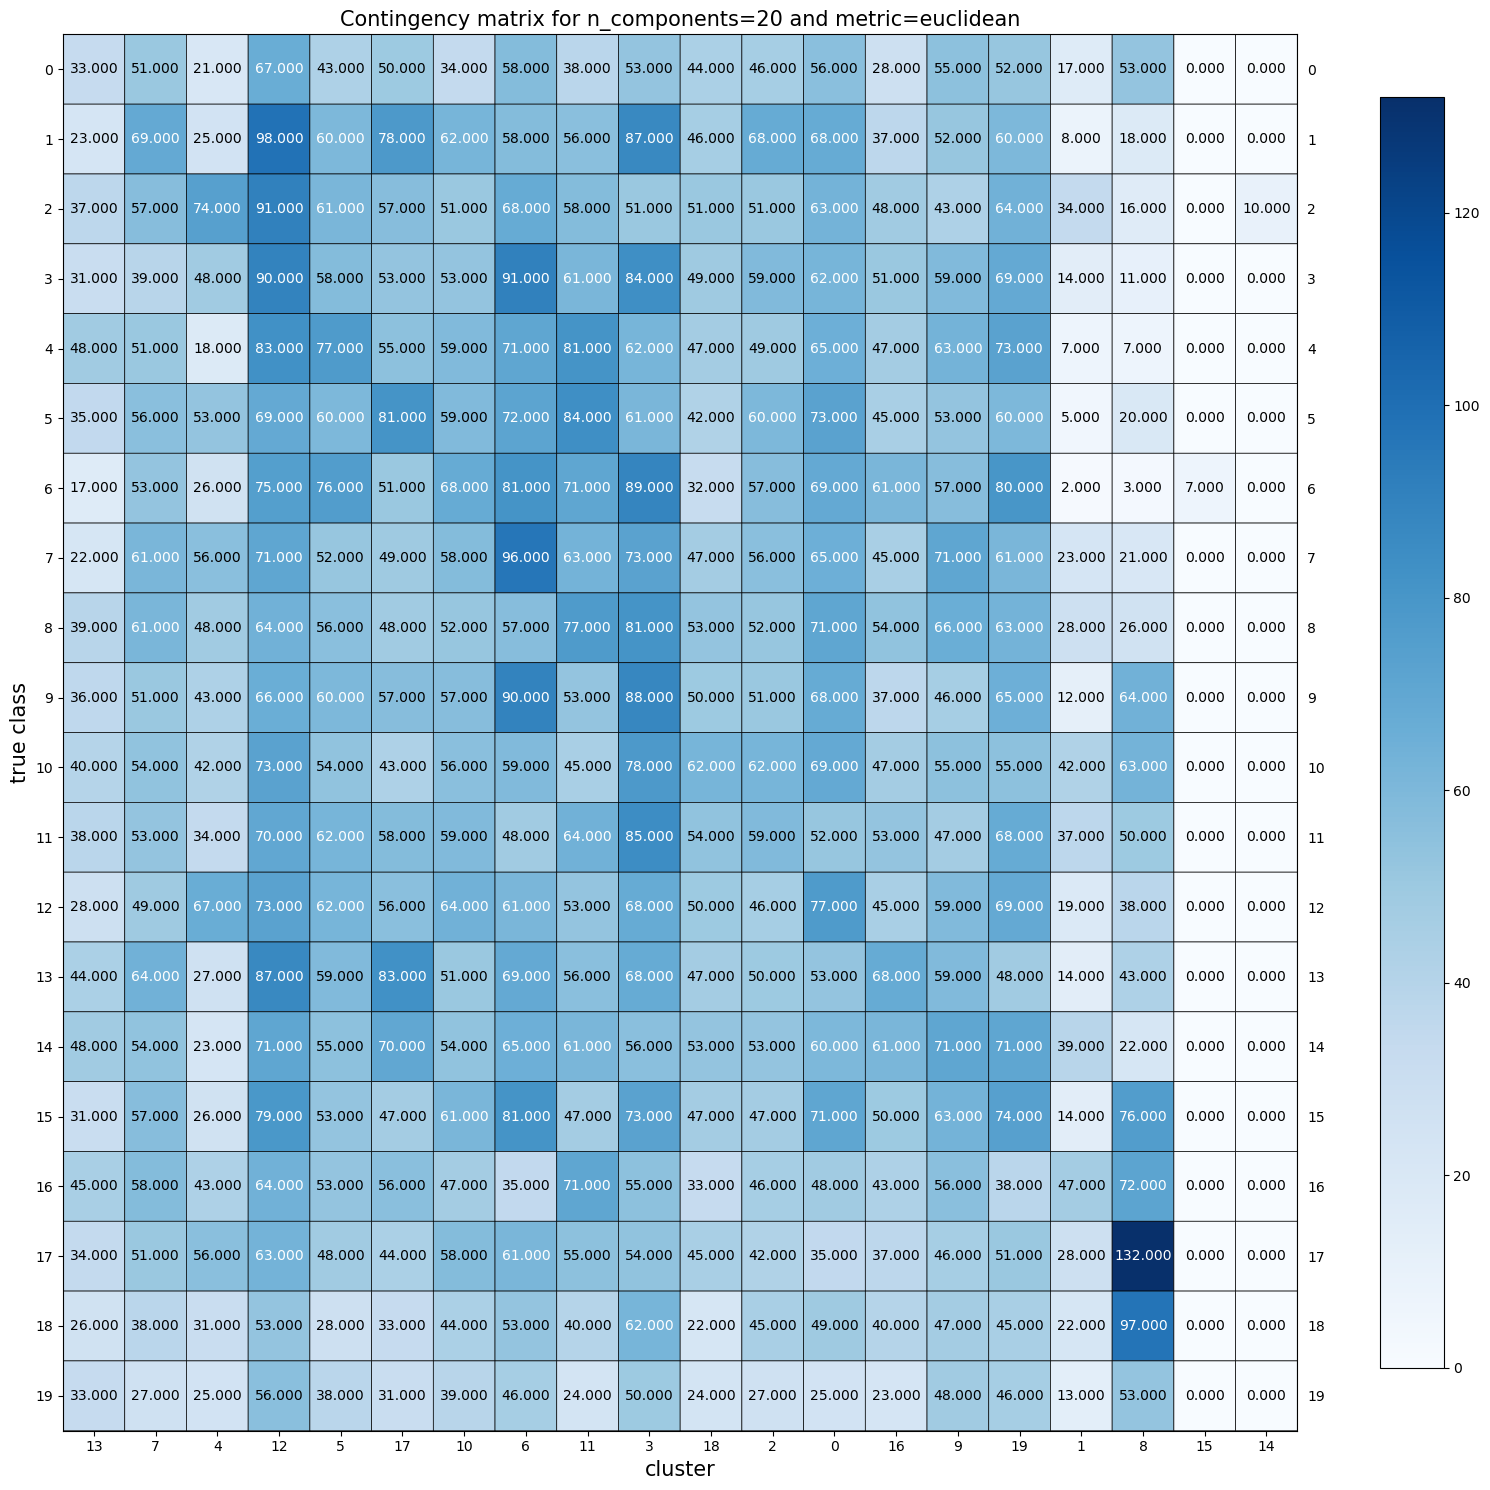

n_components = 20 , metric = euclidean
Homogeneity = 0.01194428164599341
Completeness = 0.012464026339677409
V-measure = 0.012198620333010009
Adjusted Rand-Index = 0.0021989105418195403
Adjusted mutual information score = 0.008954412327888456


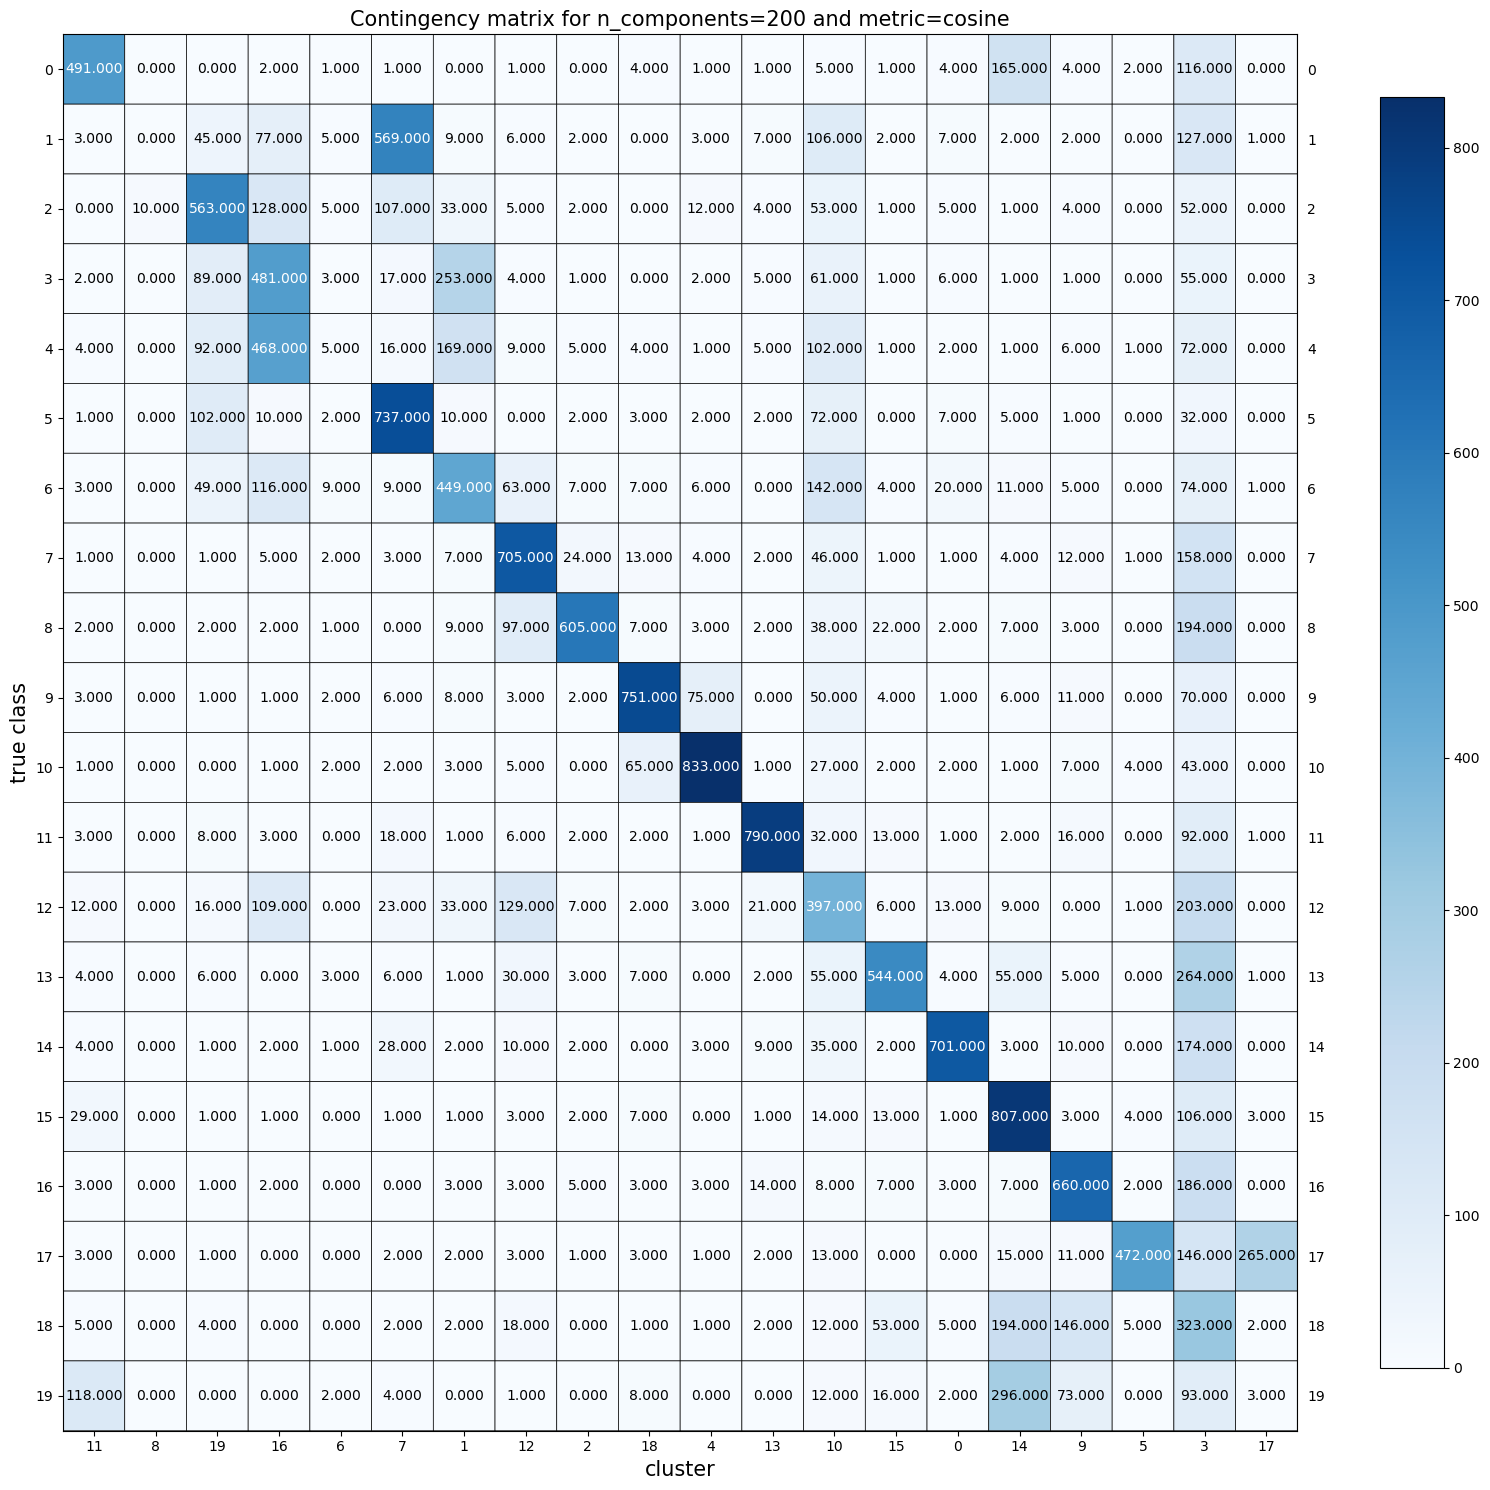

n_components = 200 , metric = cosine
Homogeneity = 0.51791126975736
Completeness = 0.5534777574646264
V-measure = 0.5351041701336519
Adjusted Rand-Index = 0.3463029706261176
Adjusted mutual information score = 0.5335404064711132


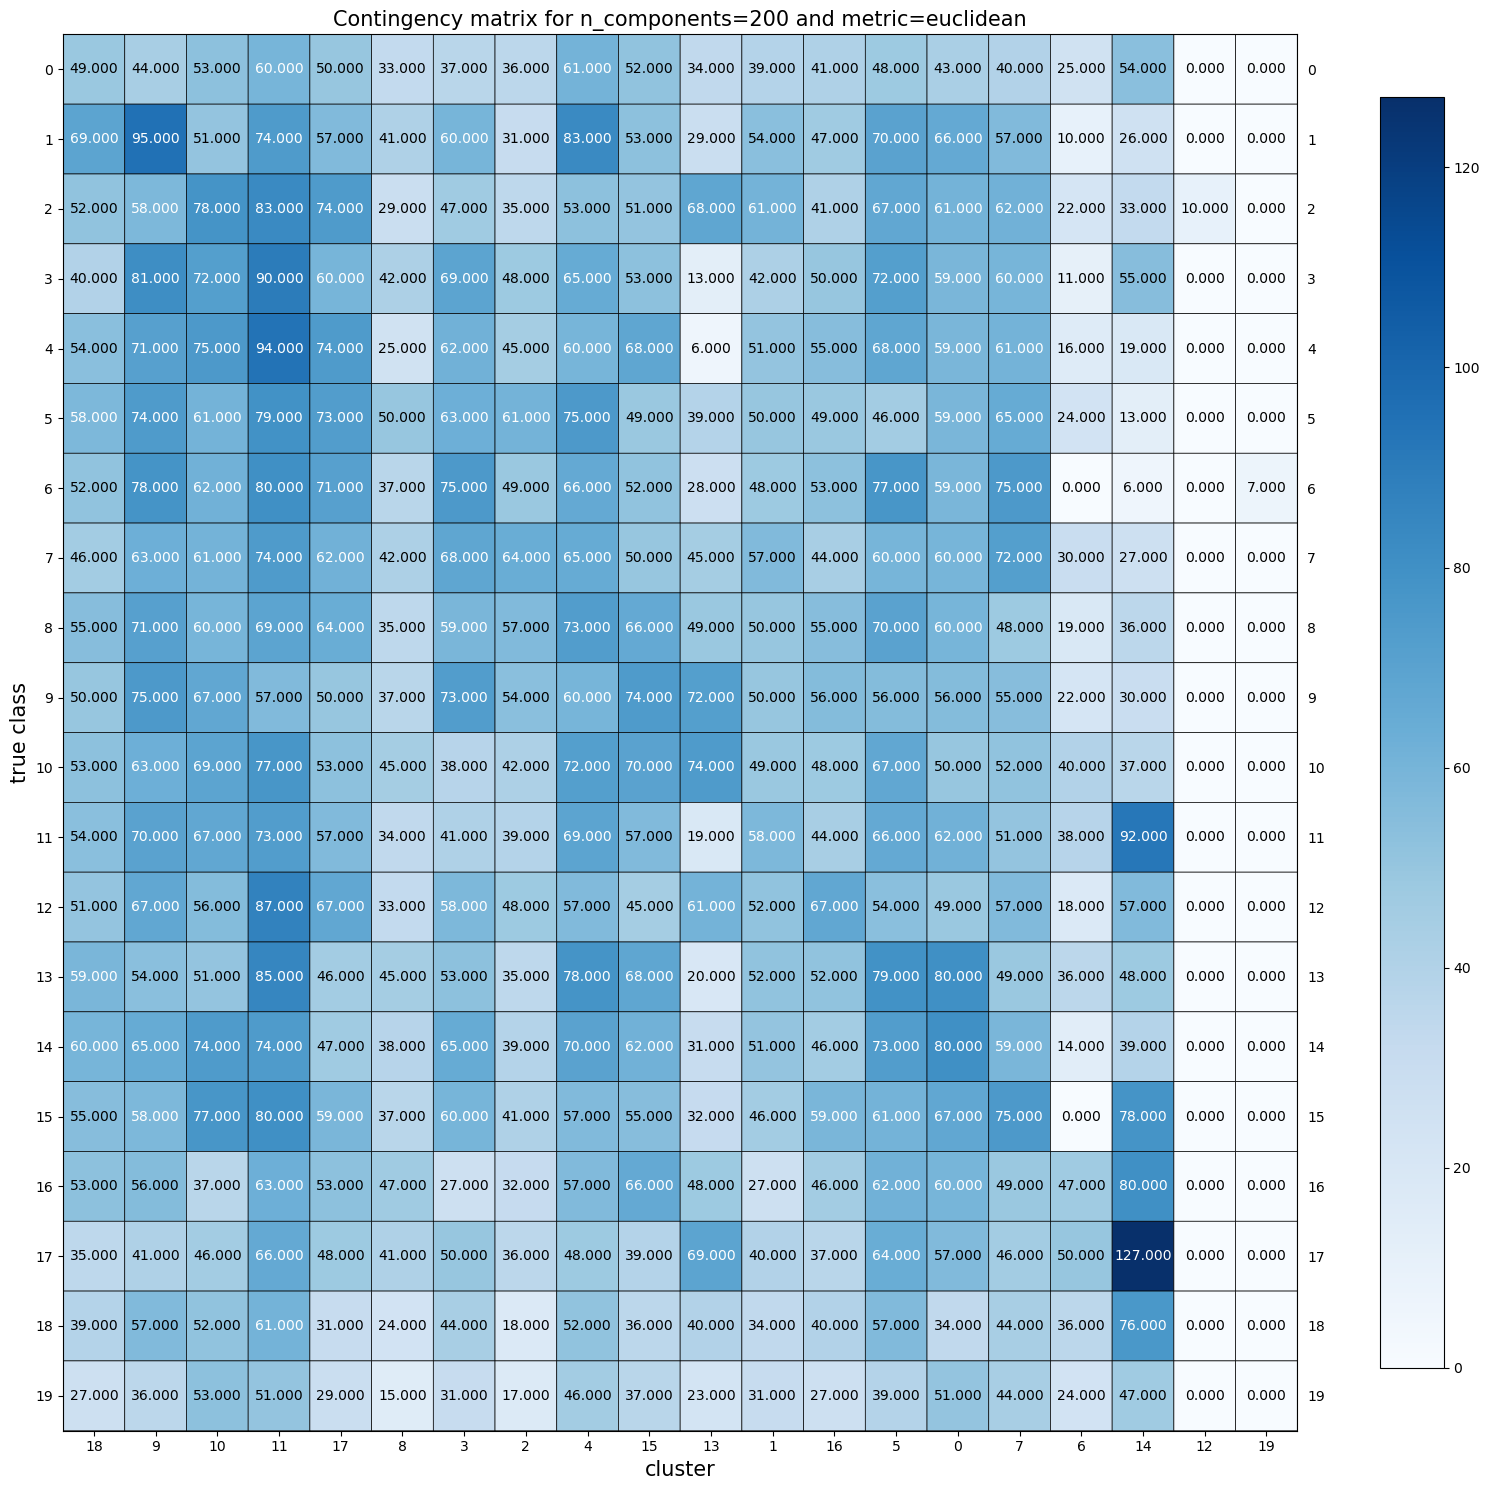

n_components = 200 , metric = euclidean
Homogeneity = 0.011504679262363256
Completeness = 0.01198734786902531
V-measure = 0.011741055096538897
Adjusted Rand-Index = 0.001990267736957959
Adjusted mutual information score = 0.00849792551583438


In [ ]:
import umap.umap_ as umap
for n in [5,20,200]:
    for m in ['cosine' , 'euclidean']:
        pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                        ('tfid', TfidfTransformer()),
                 ('dimension reduction',umap.UMAP(n_components = n, metric = m)),
                 ('clustering',KMeans(n_clusters=20,max_iter=1000,n_init=30,random_state=0))
                ]) 

        X = pipe.fit_transform(newsgroups.data)
        labels_pred = pipe['clustering'].labels_
        scores = {}
        scores["Homogeneity"]=metrics.homogeneity_score(y, labels_pred)
        scores["Completeness"]=metrics.completeness_score(y, labels_pred)
        scores["V-measure"]=metrics.v_measure_score(y, labels_pred)
        scores["Adjusted Rand-Index"]=metrics.adjusted_rand_score(y, labels_pred)
        scores["Adjusted mutual information score"]=metrics.adjusted_mutual_info_score(y, labels_pred)
        cm = confusion_matrix(y, labels_pred)
        rows, cols = linear_sum_assignment(cm, maximize=True)
        plotmat.plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15), xlabel = 'cluster', ylabel = 'true class', title = f'Contingency matrix for n_components={n} and metric={m}')
        print(f'n_components = {n} , metric = {m}')
        for item in scores.keys():
            print(f'{item} = {scores[item]}')
        
        

QUESTION 12: Analyze the contingency matrices. Which setting works best and why? What about for each metric choice?<br>
*Please see below the best setting for contingency matrix and each metric: <br>
**contingency matrices:** n_components=20, metric=cosine<br>
**Homogeneity:** n_components=200, metric=cosine<br>
**Completeness:** n_components=200, metric=cosine<br>
**V-measure:** n_components=200, metric=cosine<br>
**Adjusted Rand-Index:** n_components=20, metric=cosine<br>
**Adjusted mutual information score:** n_components=200, metric=cosine<br>*

QUESTION 13: So far, we have attempted K-Means clustering with 4 different representation learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced). Compare and contrast the clustering results across the 4 choices, and suggest an approach that is best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering metrics for your comparison.<br>
*Based on the adjusted mutual info score metric, UMAP performs significantly better than other dimensionality reduction algorithms. However, it is slightly slower than the others to run and higher number of components is required for its satisfactory performance. See below (by 'passthrough' I mean no dimensionality reduction has been applied on the tf-idf matrix):*

In [ ]:
options = ['passthrough',TruncatedSVD(n_components=50),NMF(n_components=30, init='nndsvd'),
           umap.UMAP(n_components = 200, metric = 'cosine')]
for item in options:

    pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',item),
                     ('clustering',KMeans(n_clusters=20,max_iter=1000,n_init=30,random_state=0))
                    ]) 
    
    X = pipe.fit_transform(newsgroups.data)
    y = newsgroups.target
    labels_pred = pipe['clustering'].labels_
    scores = defaultdict(list)
    scores[item]=metrics.adjusted_mutual_info_score(y, labels_pred)
    print(f'algorithm {str(item)} has adjusted mutual info score = ',scores[item])



algorithm passthrough has adjusted mutual info score =  0.2451309459751696
algorithm TruncatedSVD(n_components=50) has adjusted mutual info score =  0.26248818740812185


/Users/golaraahmadiazar/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


algorithm NMF(init='nndsvd', n_components=30) has adjusted mutual info score =  0.2894345757488425
algorithm UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}) has adjusted mutual info score =  0.5344012335060184


In [ ]:
def evaluate_5metrics(y,labels_pred, plot = True):
    
        scores = {}
        scores["Homogeneity"]=metrics.homogeneity_score(y, labels_pred)
        scores["Completeness"]=metrics.completeness_score(y, labels_pred)
        scores["V-measure"]=metrics.v_measure_score(y, labels_pred)
        scores["Adjusted Rand-Index"]=metrics.adjusted_rand_score(y, labels_pred)
        scores["Adjusted mutual information score"]=metrics.adjusted_mutual_info_score(y, labels_pred)
        if plot:
            cm = confusion_matrix(y, labels_pred)
            rows, cols = linear_sum_assignment(cm, maximize=True)
            plotmat.plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15), xlabel = 'cluster', ylabel = 'true class', title = 'Contingency matrix')
        for item in scores.keys():
            print(f'{item} = {scores[item]}')
        return scores
    

## Agglomerative Clustering

QUESTION 14: Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with n_clusters=20 . Compare the performance of “ward” and “single” linkage criteria.
Report the five clustering evaluation metrics for each case.<br>
*As can be seen below, single linkage performs very poorly and classifies most samples into a single cluster. ward linkage has relatively high clustering evaluation metrics.*

### ward

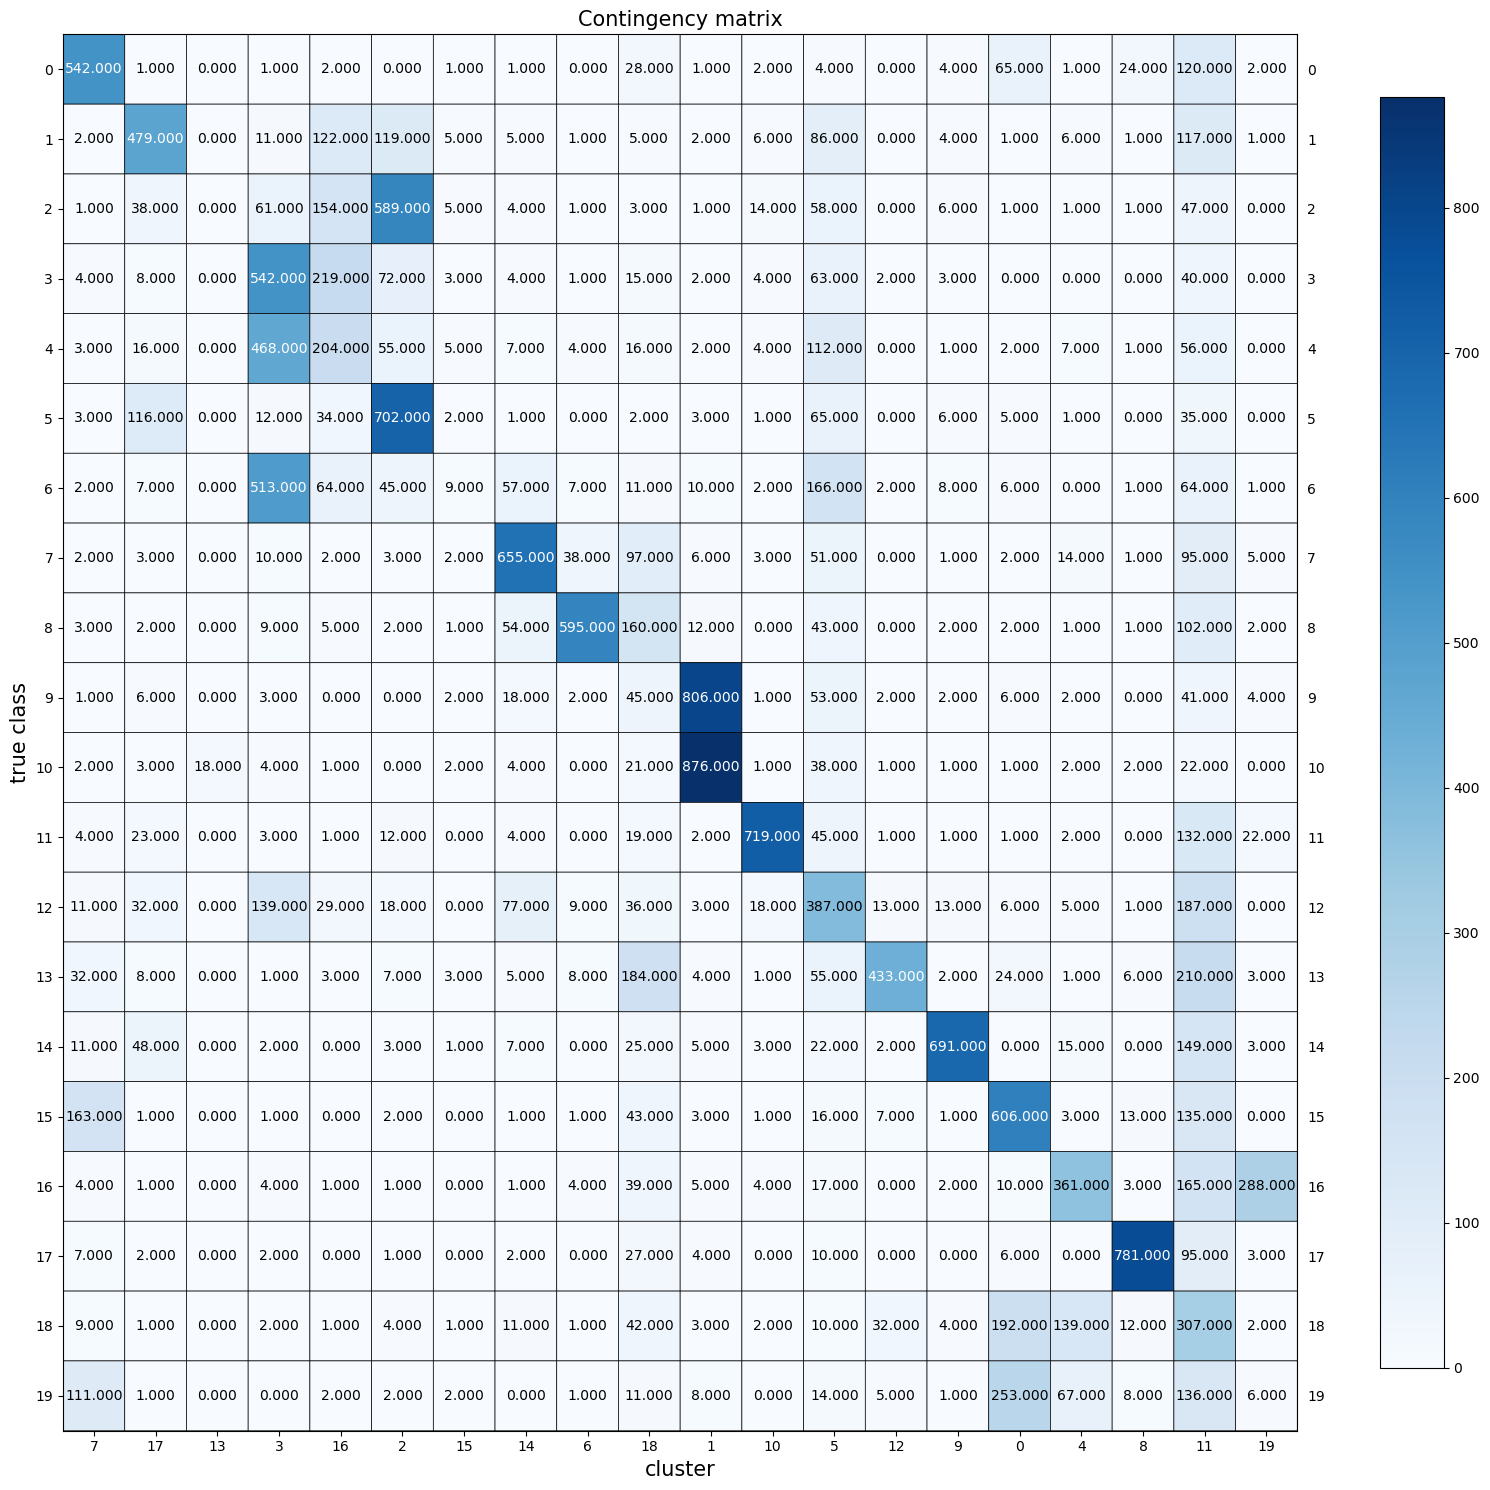

Homogeneity = 0.49551505350127945
Completeness = 0.5293087667428762
V-measure = 0.5118547338386542
Adjusted Rand-Index = 0.33021775134111075
Adjusted mutual information score = 0.510202989263299


In [ ]:
from sklearn.cluster import AgglomerativeClustering
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',umap.UMAP(n_components = 200, metric = 'cosine')),
                     ('clustering',AgglomerativeClustering(n_clusters=20, linkage='ward'))
                    ])
pipe.fit(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
scores = evaluate_5metrics(y,labels_pred)


### single

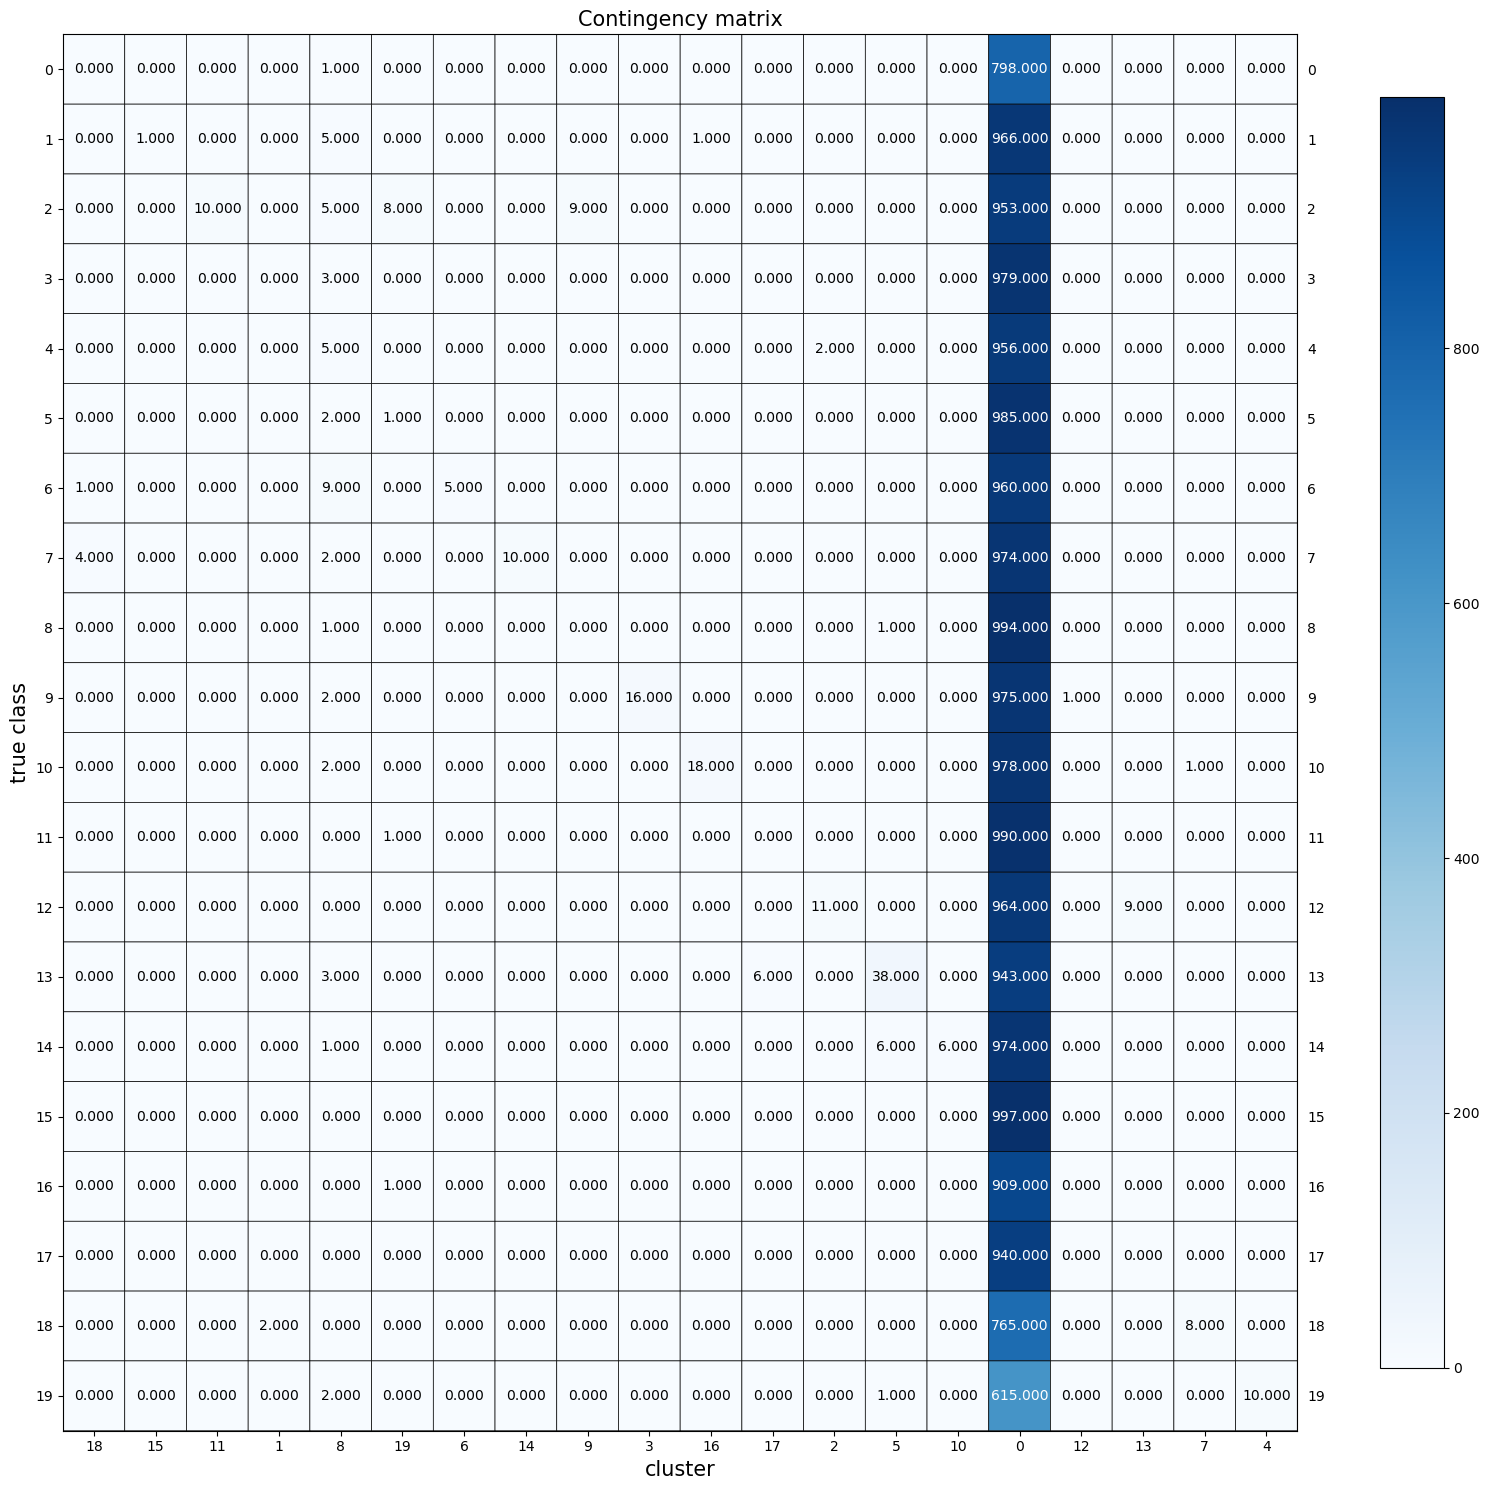

Homogeneity = 0.009493845385258656
Completeness = 0.29104134389459685
V-measure = 0.018387873488453436
Adjusted Rand-Index = 1.8035492324748175e-05
Adjusted mutual information score = 0.012830014149405223


In [ ]:
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',umap.UMAP(n_components = 200, metric = 'cosine')),
                     ('clustering',AgglomerativeClustering(n_clusters=20, linkage='single'))
                    ])
pipe.fit(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
scores = evaluate_5metrics(y,labels_pred)


## HDBSCAN
https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#the-simple-case <br>
QUESTION 15: Apply HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100.

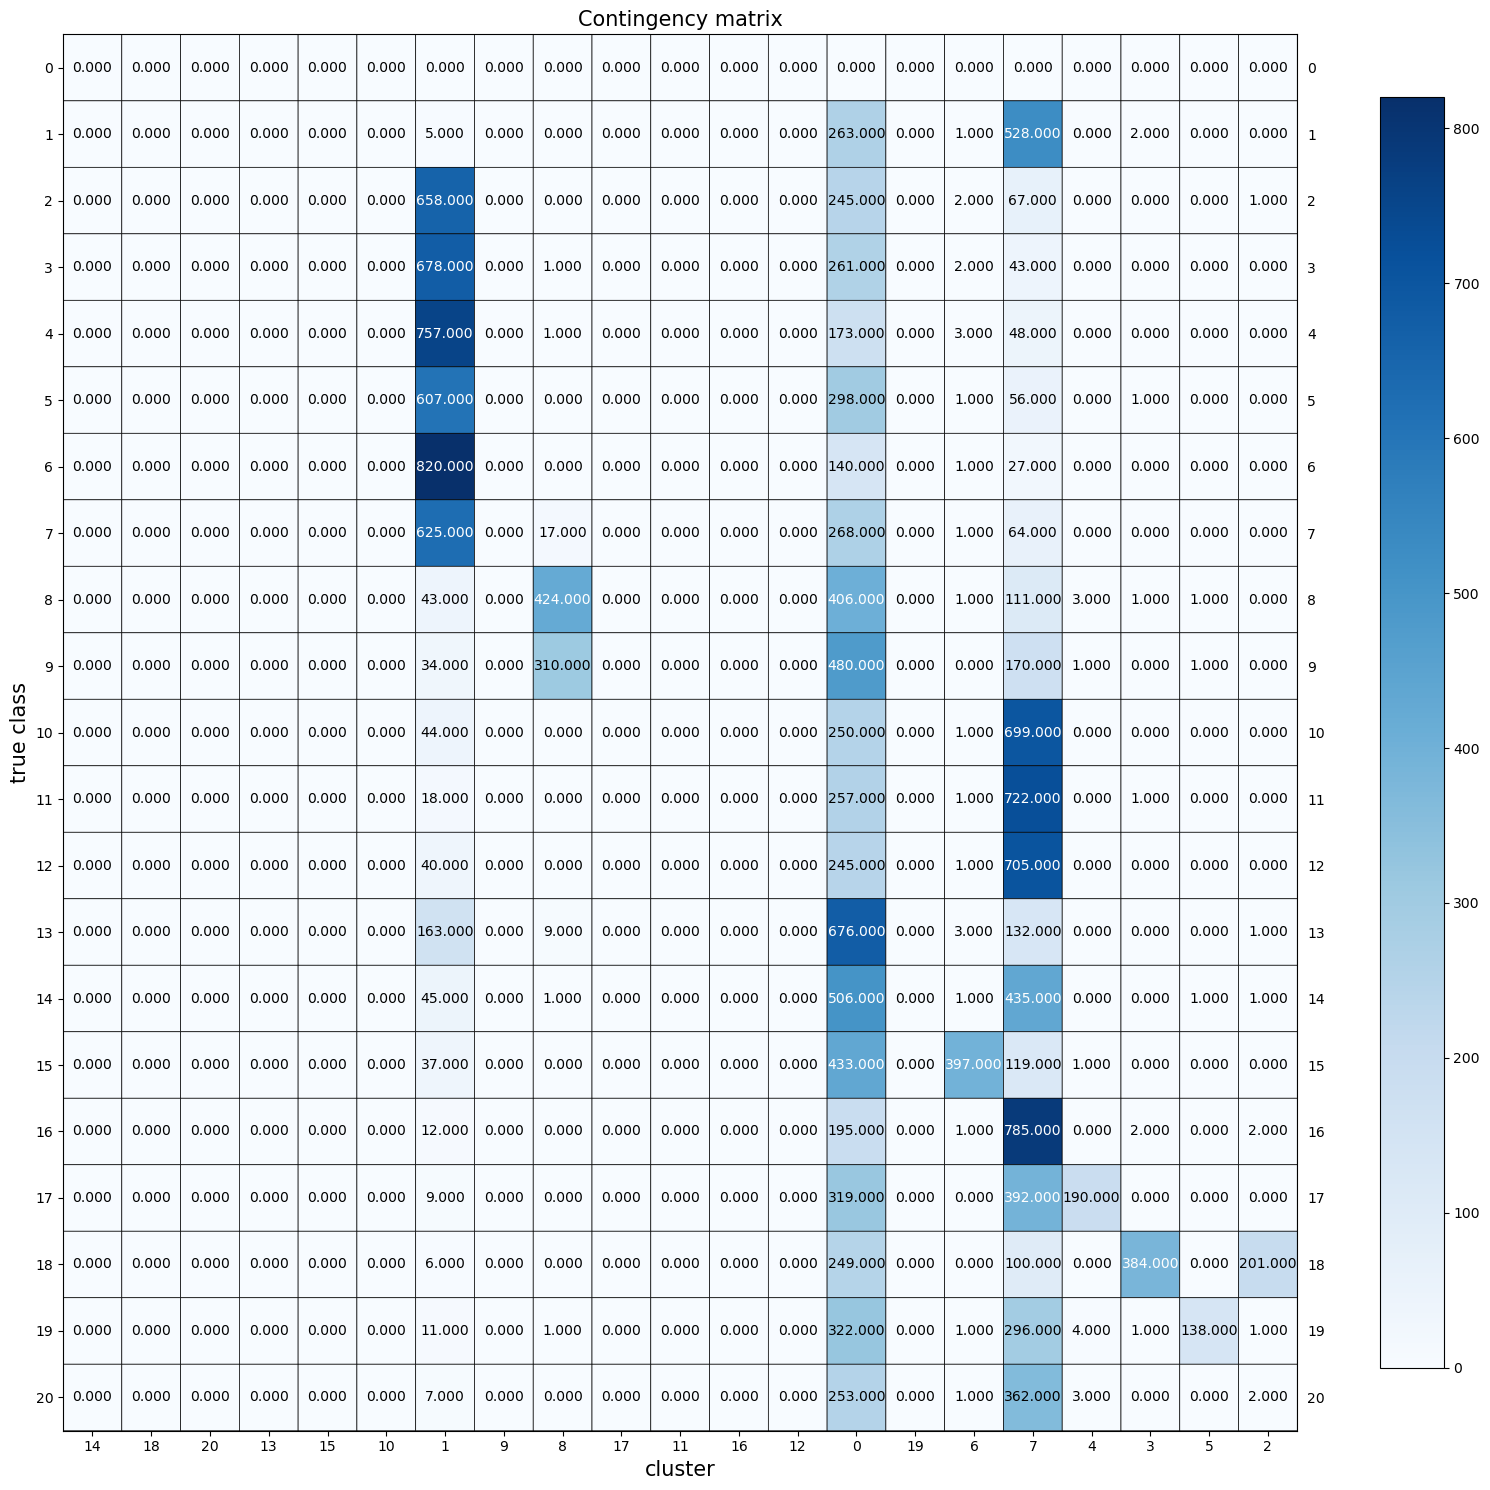

Homogeneity = 0.21115632434092554
Completeness = 0.4197865244389943
V-measure = 0.28097815730790227
Adjusted Rand-Index = 0.07880019542752709
Adjusted mutual information score = 0.279670225166761


In [ ]:
!pip install hdbscan
import hdbscan
 
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',umap.UMAP(n_components = 200, metric = 'cosine')),
                     ('clustering',hdbscan.HDBSCAN(metric='manhattan', min_cluster_size=100))
                    ])
pipe.fit(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
scores = evaluate_5metrics(y,labels_pred)

Vary the min cluster size among 20, 100, 200 and report your findings in terms of the five clustering evaluation metrics - you will plot the best contingency matrix in the next question. Feel free to try modifying other parameters in HDBSCAN to get better performance. <br>
*Based on the following results, min_cluster_size=20 has relatively better performance because for 3 metrics out of 5 (namely Homogeneity, V-measure, and Adjusted mutual information score) it outperforms other choices. However, in the next section I have to use min_cluster_size=200 which is the second best choice since min_cluster_size=20 resulted in more than 100 clusters!!!*


In [ ]:
for m in [20,100,200]:
    
    pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',umap.UMAP(n_components = 200, metric = 'cosine')),
                     ('clustering',hdbscan.HDBSCAN(metric='manhattan', min_cluster_size=m))
                    ])
    pipe.fit(newsgroups.data)
    y = newsgroups.target
    labels_pred = pipe['clustering'].labels_
    print(f'minimum cluster size = {m}')
    scores = evaluate_5metrics(y,labels_pred, plot=False)
    

minimum cluster size = 20
Homogeneity = 0.3328776253310269
Completeness = 0.3839029024581681
V-measure = 0.35657410203963474
Adjusted Rand-Index = 0.01857281019156978
Adjusted mutual information score = 0.3421928369614211
minimum cluster size = 100
Homogeneity = 0.20602699515969908
Completeness = 0.37679630976413064
V-measure = 0.26639364223128537
Adjusted Rand-Index = 0.042698730869191674
Adjusted mutual information score = 0.2637804761012942
minimum cluster size = 200
Homogeneity = 0.2192150129036052
Completeness = 0.4246316092068347
V-measure = 0.2891546542138659
Adjusted Rand-Index = 0.05140526780054288
Adjusted mutual information score = 0.2877167104144469


QUESTION 16: Contingency matrix <br>
Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model?<br>
 *There are 9 clusters including the -1 label which means noisy data. Please note that the plotting code that is provided automatically sets the x axis to range from 0 to N-1 where N is the number of clusters so it does not show the exact label.*<br>

What does “-1” mean for the clustering labels? Interpret the contingency matrix considering the answer to these questions.<br>
*Noisy samples get label "-1" to show that they did not belong to any of the clusters. Classes 1 to 6 seem to be very similar and they are mostly clustered into one group. Classes 9 and 10 also seem to be clustered mostly into one group.*

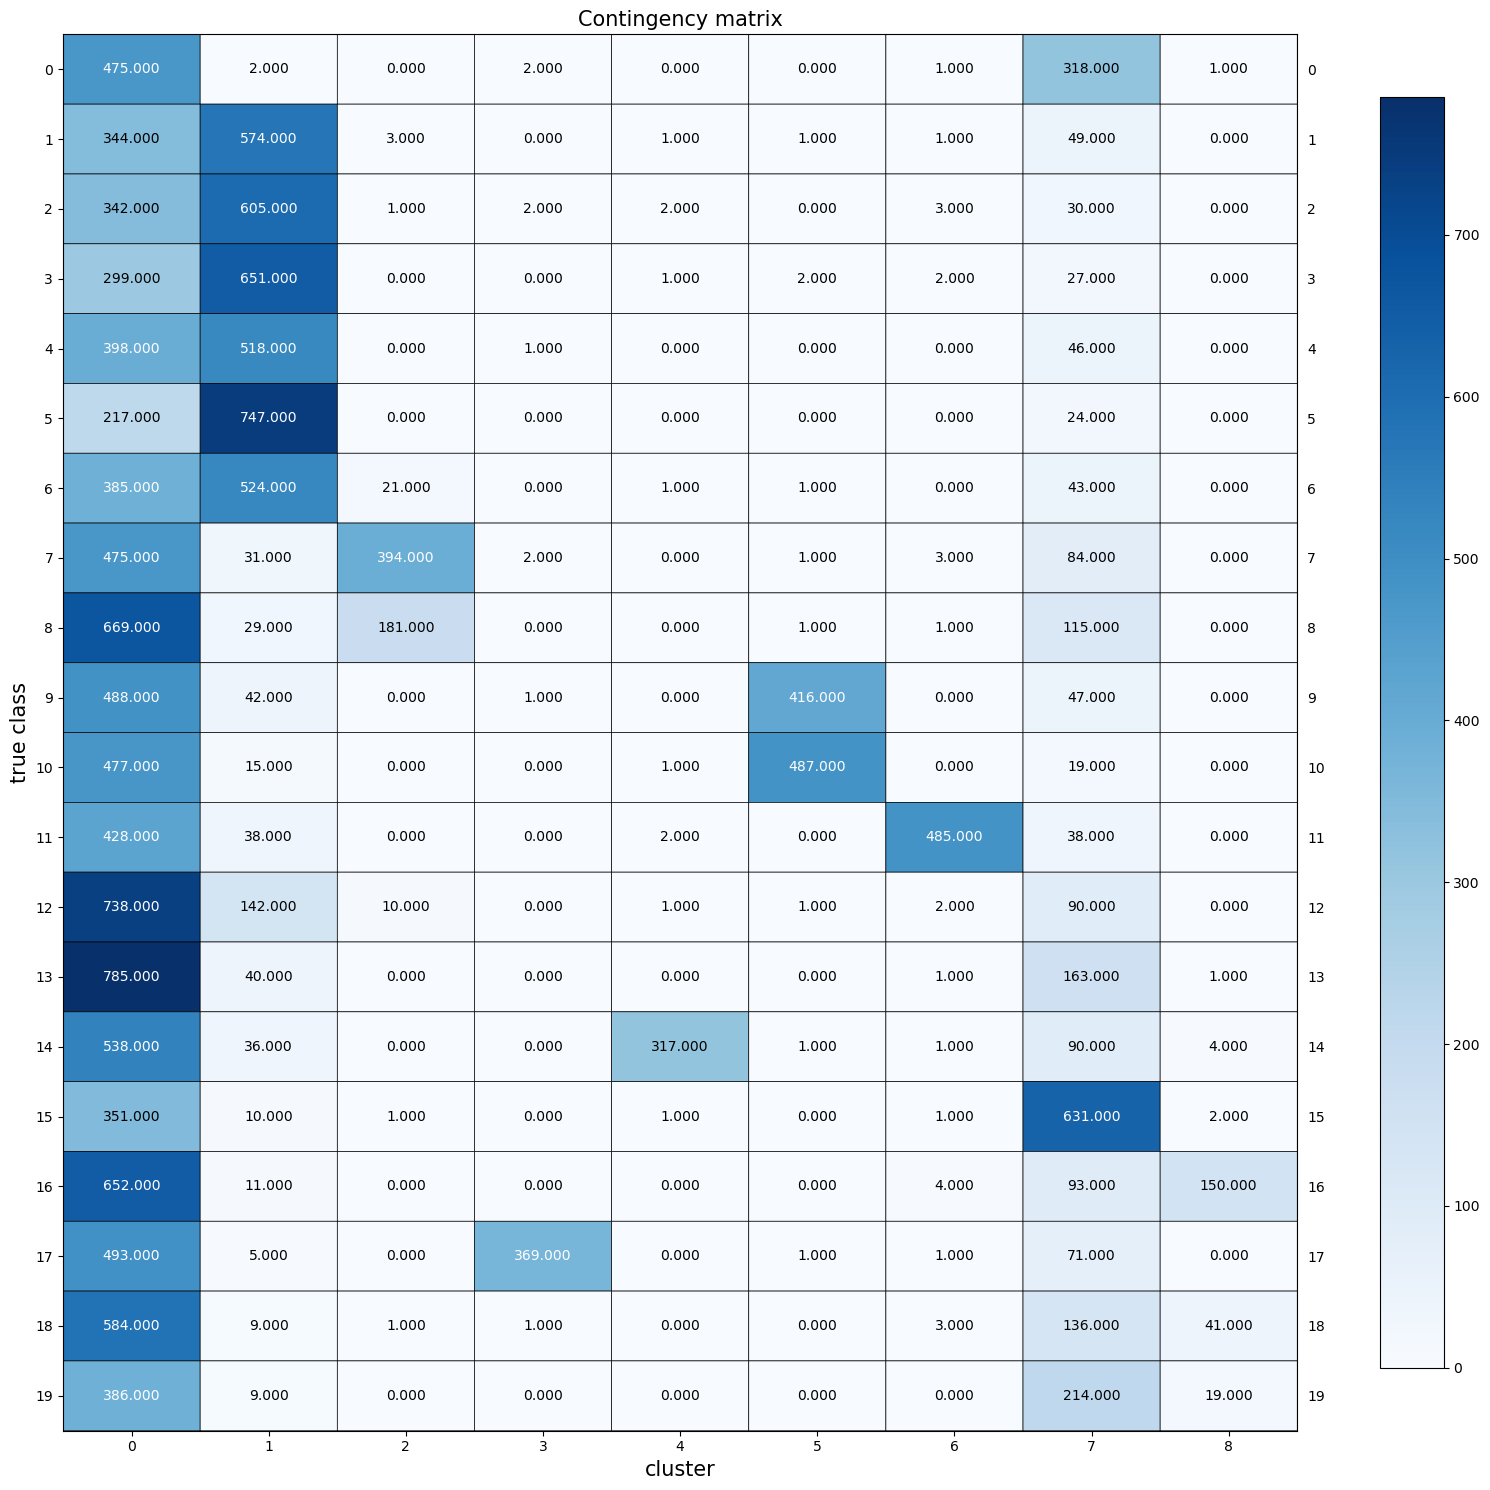

In [ ]:
pipe = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('dimension reduction',umap.UMAP(n_components = 200, metric = 'cosine')),
                     ('clustering',hdbscan.HDBSCAN(metric='manhattan', min_cluster_size=200))
                    ])
pipe.fit(newsgroups.data)
y = newsgroups.target
labels_pred = pipe['clustering'].labels_
A = contingency_matrix(y, labels_pred)
plotmat.plot_mat(A, size=(15,15), xlabel = 'cluster', ylabel = 'true class', title = 'Contingency matrix')


In [ ]:
print('assigned labels are: ',np.unique(pipe['clustering'].labels_))

assigned labels are:  [-1  0  1  2  3  4  5  6  7]


QUESTION 17: Based on your experiments, which dimensionality reduction technique and clustering methods worked best together for 20-class text data and why? <br>
*Due to computational limitations, I had to do a brute force search over each clustering algorithm separately. Please see the results for each below:*
*Based on the experiments above, the best selection is: <br>
**Kmeans(n_clusters=20) clustering with UMAP(metric='cosine', n_components=5)** which resulted in (CV score=0.533)*

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.metrics import homogeneity_score, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups = fetch_20newsgroups(remove=("headers", "footers"), 
                                subset='all', shuffle=True,random_state=42,)


preprocess = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),])

#pre = TfidfVectorizer(min_df=3,stop_words={'english'})
X = preprocess.fit_transform(newsgroups.data)
#X = pre.fit_transform(newsgroups.data)
y = newsgroups.target

In [ ]:
"""
def score_func(y_true, y_pred, **kwargs):
    return metrics.adjusted_mutual_info_score(y_true, y_pred)

scorer = make_scorer(score_func)    

params1 = {    
    'Dimensionality Reduction':['passthrough',TruncatedSVD(),NMF(init='nndsvd',tol=0.01),umap.UMAP(metric = 'cosine')],
    'Dimensionality Reduction__n_components':[5,20,200], 
    'Clustering__n_clusters': [10,20,50] 
    }
                                          

pipe1 = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('Dimensionality Reduction',umap.UMAP(n_components = 20, metric = 'cosine')),
                     ('Clustering',KMeans(max_iter=5000,n_init=50,random_state=0))
                    ])

#search = GridSearchCV(pipe, params, cv=5,scoring='accuracy', refit=True, verbose=2) #this took too long to run so I replaced it with RandomizedSearchCV
search1 = RandomizedSearchCV(pipe1, params1, cv=3, n_iter = 10, refit=True, scoring=scorer, verbose=2)
search1.fit(newsgroups.data, newsgroups.target)
print("Best parameter (CV score=%0.3f) for Kmeans clustering gives score:" % search1.best_score_)
print(search1.best_params_)


params3 = {    
    'Dimensionality Reduction':['passthrough',TruncatedSVD(),NMF(init='nndsvd',tol=0.01),umap.UMAP(metric = 'cosine')],
    'Dimensionality Reduction__n_components':[5,20,200], 
    'Clustering__min_cluster_size': [100,200] 
    }


pipe3 = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('Dimensionality Reduction',umap.UMAP(n_components = 20, metric = 'cosine')),
                     ('Clustering',hdbscan.HDBSCAN(metric='manhattan'))
                    ])

search3 = RandomizedSearchCV(pipe3, params3, cv=3, n_iter = 10, refit=True, scoring=scorer)
search3.fit(newsgroups.data, newsgroups.target)
print("Best parameter (CV score=%0.3f) for HDBSCAN clustering gives score:" % search3.best_score_)
print(search3.best_params_)


params2 = {   
    'Dimensionality Reduction':['passthrough',TruncatedSVD(),NMF(init='nndsvd',tol=0.01),umap.UMAP(metric = 'cosine')],
    'Dimensionality Reduction__n_components':[5,20,200], 
    }

pipe2 = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                            ('tfid', TfidfTransformer()),
                     ('Dimensionality Reduction',umap.UMAP(n_components = 20, metric = 'cosine')),
                     ('Clustering',AgglomerativeClustering(n_clusters=20, linkage='ward'))
                    ])
search2 = GridSearchCV(pipe2, params2, cv=3, refit=True, scoring=scorer)
search2.fit(newsgroups.data, newsgroups.target)
print("Best parameter (CV score=%0.3f) for Agglomerative Clustering  gives score:" % search2.best_score_)
print(search2.best_params_)
"""

### Evaluating various hyperparameters for Kmeans Clustering

In [ ]:
dim_alg = ['passthrough',TruncatedSVD(n_components=5),TruncatedSVD(n_components=20),TruncatedSVD(n_components=200),
           NMF(init='nndsvd',tol=0.01,n_components=5),NMF(init='nndsvd',tol=0.01,n_components=20),NMF(init='nndsvd',tol=0.1,n_components=200),
           umap.UMAP(metric = 'cosine',n_components=5),umap.UMAP(metric = 'cosine',n_components=20),umap.UMAP(metric = 'cosine',n_components=200)]
best_alg = None
best_score = float('-inf')
best_k = None

for alg in dim_alg:
    for k in [10,20,50]:
        
        print('working on: ',alg,k)
        
        pipe1 = Pipeline([
                         ('Dimensionality Reduction',alg),
                         ('Clustering',KMeans(n_clusters = k, max_iter=1000,n_init=30,random_state=0))
                        ])
        pipe1.fit(X)
        labels_pred = pipe1['Clustering'].labels_
        score = metrics.adjusted_mutual_info_score(y, labels_pred)
        if score>best_score:
            best_score = score
            best_alg = alg
            best_k = k

        
print("Best parameter (CV score=%0.3f) for Kmeans clustering gives score:" % best_score)
print("Best dimension reduction algorithm: ",best_alg)
print("Best n_clusters: ",best_k)


working on:  passthrough 10
working on:  passthrough 20
working on:  passthrough 50
working on:  TruncatedSVD(n_components=5) 10
working on:  TruncatedSVD(n_components=5) 20
working on:  TruncatedSVD(n_components=5) 50
working on:  TruncatedSVD(n_components=20) 10
working on:  TruncatedSVD(n_components=20) 20
working on:  TruncatedSVD(n_components=20) 50
working on:  TruncatedSVD(n_components=200) 10
working on:  TruncatedSVD(n_components=200) 20
working on:  TruncatedSVD(n_components=200) 50
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 10
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 20
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 50
working on:  NMF(init='nndsvd', n_components=20, tol=0.01) 10
working on:  NMF(init='nndsvd', n_components=20, tol=0.01) 20
working on:  NMF(init='nndsvd', n_components=20, tol=0.01) 50
working on:  NMF(init='nndsvd', n_components=200, tol=0.1) 10
working on:  NMF(init='nndsvd', n_components=200, tol=0.1) 20
working o

### Evaluating various hyperparameters for Agglomerative Clustering

NOTE: I noticed that Agglomerative Clustering is very slow when no dimensionality reduction is performed (i.e 'passthrough' in pipeline). So, I have commented my implementation for this clustering based on the discussions on Piazza and only considered other algorithms.

In [ ]:
dim_alg = [TruncatedSVD(n_components=5),TruncatedSVD(n_components=20),TruncatedSVD(n_components=200), #'passthrough',
           NMF(init='nndsvd',tol=0.01,n_components=5),NMF(init='nndsvd',tol=0.01,n_components=20),NMF(init='nndsvd',tol=0.1,n_components=200, max_iter=50),
           umap.UMAP(metric = 'cosine',n_components=5),umap.UMAP(metric = 'cosine',n_components=20),umap.UMAP(metric = 'cosine',n_components=200)]
best_alg = None
best_score = float('-inf')

for alg in dim_alg:
    
    print('working on: ',alg)
    pipe2 = Pipeline([
                     ('Dimensionality Reduction',alg),
                     ('Clustering',AgglomerativeClustering(n_clusters=5, linkage='ward'))
                    ])
    #if alg=='passthrough':
    #    pipe2.fit(np.asarray(X.todense())) #.todense()
    #else:
    pipe2.fit(X)
    labels_pred = pipe2['Clustering'].labels_
    score = metrics.adjusted_mutual_info_score(y, labels_pred)
    if score>best_score:
        best_score = score
        best_alg = alg

        
print("Best parameter (CV score=%0.3f) for Agglomerative Clustering gives score:" % best_score)
print("Best dimension reduction algorithm: ",best_alg)

working on:  TruncatedSVD(n_components=5)
working on:  TruncatedSVD(n_components=20)
working on:  TruncatedSVD(n_components=200)
working on:  NMF(init='nndsvd', n_components=5, tol=0.01)
working on:  NMF(init='nndsvd', n_components=20, tol=0.01)
working on:  NMF(init='nndsvd', max_iter=50, n_components=200, tol=0.1)
working on:  UMAP(metric='cosine', n_components=5)
working on:  UMAP(metric='cosine', n_components=20)
working on:  UMAP(metric='cosine', n_components=200)
Best parameter (CV score=0.366) for Agglomerative Clustering gives score:
Best dimension reduction algorithm:  UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})


Evaluating various hyperparameters for HDBSCAN Clustering

In [ ]:
dim_alg = ['passthrough',TruncatedSVD(n_components=5),TruncatedSVD(n_components=20),TruncatedSVD(n_components=200, tol=0.001), #
           NMF(init='nndsvd',tol=0.01,n_components=5),NMF(init='nndsvd',tol=0.01,n_components=20),NMF(init='nndsvd',tol=0.1,n_components=200, max_iter=50),
           umap.UMAP(metric = 'cosine',n_components=5),umap.UMAP(metric = 'cosine',n_components=20),umap.UMAP(metric = 'cosine',n_components=200)]

best_alg = None
best_score = float('-inf')

Clustering__min_cluster_size=[50,100]
Clustering__min_samples=[10,50]
best_cluster_size = None
best_samples = None

for alg in dim_alg:
    for c in Clustering__min_cluster_size:
        for s in Clustering__min_samples:
            
            print('working on: ',alg,c,s)
            
            pipe3 = Pipeline([
                     ('Dimensionality Reduction',alg),
                     ('Clustering',hdbscan.HDBSCAN(min_cluster_size = c, min_samples=s, metric='manhattan'))
                    ])
            
            pipe3.fit(X)
            labels_pred = pipe3['Clustering'].labels_
            score = metrics.adjusted_mutual_info_score(y, labels_pred)
            if score>best_score:
                best_score = score
                best_alg = alg
                best_cluster_size = c
                best_samples = s
print("Best parameter (CV score=%0.3f) for HDBSCAN Clustering gives score:" % best_score)
print("Best dimension reduction algorithm: ",best_alg)
print("Best min_cluster_size: ",best_cluster_size)
print("Best min_samples: ",best_samples)

working on:  passthrough 50 10
working on:  passthrough 50 50
working on:  passthrough 100 10
working on:  passthrough 100 50
working on:  TruncatedSVD(n_components=5) 50 10
working on:  TruncatedSVD(n_components=5) 50 50
working on:  TruncatedSVD(n_components=5) 100 10
working on:  TruncatedSVD(n_components=5) 100 50
working on:  TruncatedSVD(n_components=20) 50 10
working on:  TruncatedSVD(n_components=20) 50 50
working on:  TruncatedSVD(n_components=20) 100 10
working on:  TruncatedSVD(n_components=20) 100 50
working on:  TruncatedSVD(n_components=200, tol=0.001) 50 10
working on:  TruncatedSVD(n_components=200, tol=0.001) 50 50
working on:  TruncatedSVD(n_components=200, tol=0.001) 100 10
working on:  TruncatedSVD(n_components=200, tol=0.001) 100 50
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 50 10
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 50 50
working on:  NMF(init='nndsvd', n_components=5, tol=0.01) 100 10
working on:  NMF(init='nndsvd', n_component

QUESTION 18: Extra credit: If you can find creative ways to further enhance the clustering performance, report your method and the results you obtain.<br>
*I tried changing various hyperparameters and even two consecutive dimensionality reduction algorithms but the performance was not significantly better than before.*

In [ ]:
pipe4 = Pipeline([('count', CountVectorizer(min_df=3,stop_words={'english'})), 
                         ('tfid', TfidfTransformer()),
                         #('dim1',TruncatedSVD(n_components=200)),
                         ('Dimensionality Reduction',umap.UMAP(metric = 'cosine',n_components=5)),
                         ('Clustering',KMeans(n_clusters = 20, max_iter=1000,n_init=30,random_state=5, init='random', algorithm='elkan'))
                        ])
pipe4.fit(newsgroups.data)
y = newsgroups.target
labels_pred = pipe4['Clustering'].labels_
score = metrics.adjusted_mutual_info_score(y, labels_pred)
print("Best parameter gives score: (CV score=%0.3f)" % score)

Best parameter gives score: (CV score=0.536)
